**CAPSTONE MODUL 2 : ONLINE RETAIL SHIPPING - ALIFIA LISTU SAMATHA - JCDS BANDUNG**

****
# **Table of Contents**
****
1. [Background](#background)
2. [Problem Statement](#problem-statement)
3. [Load Data](#load-data)
4. [Data Understanding & Cleaning](#data-understanding--cleaning)
   1.  [Drop ID Column](#drop-id-column)
   2. [Warehouse Block Column - Possibility of Incorrect Input](#warehouse-block-column---possibility-of-incorrect-input)
   3. [Data Distribution & Oulier Detection](#data-distribution--oulier-detection)
   4. [Handling Outliers](#handling-outliers)
5. [Exploratory Data Analysis](#exploratory-data-analysis)
   1. [Value Counts of Categorical Columns](#value-counts-of-categorical-columns)
   2.  [Reached on Time Analysis](#reached-on-time-analysis)
   3.  [Customer Care Calls Analysis](#customer-care-calls-analysis)
   4.  [Product Importance Analysis](#product-importance-analysis)
   5.  [Cost of Product Analysis](#cost-of-product-analysis)
   6.  [Customer Rating Analysis](#customer-rating-analysis)
   7.  [Discount Offered Analysis](#discount-offered-analysis)
6.  [Conclusions](#conclusions)
7.  [Recommendations](#recommendations)

****
# **Background**
****
**An international e-commerce company wants to analyze their customer database for key insights. Several shipments did not arrive on time among the large number of shipments, resulting in potential customers giving the company low ratings.**

****
# **Problem Statement**
****
**The company wants to know whether or not the product is delivered on time. This data can help improve e-commerce customer satisfaction (minimize low ratings).**

**As a data analyst, we will try to answer the following questions:**
1. What should be done to increase the probability of products being delivered on time?
2. What should be done to improve the customer rating?


****
# **Load Data**
****
**To answer the above questions, we will analyze customer data collected by the company. The dataset can be found [<font color='#B85048'><u>here</u>](https://drive.google.com/file/d/1LiIEty4z_jZSIV7CvsNjMTpQuuAdDDha/view?usp=sharing)</font>.**

In [169]:
# Load Library for Data Analysis
import numpy as np
import pandas as pd

# Load Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
# Import Dataset
df = pd.read_csv('Online Retail Shipping.csv')

**This dataset contains information about customer product delivery details. The online retail shipping dataset has 12 columns, which are as follows:**

| No | Column Name         | Description                                                                                            |
|----|---------------------|--------------------------------------------------------------------------------------------------------|
| 1  | ID                  | ID number of customers.                                                                                |
| 2  | Warehouse Block     | The company has a big warehouse that is divided into blocks (A-E).                                     |
| 3  | Mode of Shipment    | The company ships the products in multiple ways (Ship, Flight, and Road).                              |
| 4  | Customer Care Calls | The number of calls made from inquiries for inquiries of the shipment.                                 |
| 5  | Customer Rating     | Rate from each customer. 1 is the lowest, and 5 is the highest.                                        |
| 6  | Cost of The Product | Cost of the product in US Dollars.                                                                     |
| 7  | Prior Purchases     | The number of previous purchases.                                                                      |
| 8  | Product Importance  | The company has categorized the product in various parameters (low, medium, high).                     |
| 9  | Gender              | Male and female.                                                                                       |
| 10 | Discount Offered    | Discount offered on that specific product.                                                             |
| 11 | Weight in gms       | The weight in grams.                                                                                   |
| 12 | Reached On Time     | 1 indicates that the product has not arrived on time, and 0 indicates the product has arrived on time. |

In [171]:
# The first and last 5 rows of dataset
display(df.head(),df.tail())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


****
# **Data Understanding & Cleaning**
****
**In the data understanding stage, we need to get to know our dataset better before moving on to the analysis. This process will reveal which anomalies exist in our dataset and which must be dealt with during the data cleaning stage. Every anomaly handler will be accompanied by a justification for the steps taken, both in domain knowledge and statistically.**

In [172]:
# DataFrame Information
def summary(df):
  types = df.dtypes
  counts = df.apply(lambda x: x.count())
  nuniques = df.apply(lambda x: x.unique().shape[0])
  nulls = df.apply(lambda x: x.isnull().sum())
  print('Data Shape:', df.shape)
  uniques = df.apply(lambda x: x.unique())

  column = ['Dtype', 'Counts', 'Nulls', 'Num of Uniques', 'Unique Values']
  str = pd.concat([types, counts, nulls, nuniques, uniques], axis = 1, sort=True)

  str.columns = column
  print('___________________________\nData Types:')
  print(str.Dtype.value_counts())
  print('___________________________')
  return str

details = summary(df)
display(details.sort_values(by='Nulls', ascending=False))

Data Shape: (10999, 12)
___________________________
Data Types:
Dtype
int64     8
object    4
Name: count, dtype: int64
___________________________


,Dtype,Counts,Nulls,Num of Uniques,Unique Values
Cost_of_the_Product,int64,10999,0,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, ..."
Customer_care_calls,int64,10999,0,6,"[4, 2, 3, 5, 6, 7]"
Customer_rating,int64,10999,0,5,"[2, 5, 3, 1, 4]"
Discount_offered,int64,10999,0,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43,..."
Gender,object,10999,0,2,"[F, M]"
ID,int64,10999,0,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Mode_of_Shipment,object,10999,0,3,"[Flight, Ship, Road]"
Prior_purchases,int64,10999,0,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
Product_importance,object,10999,0,3,"[low, medium, high]"
Reached.on.Time_Y.N,int64,10999,0,2,"[1, 0]"


In [173]:
# Check Duplictaed Values
df.duplicated().sum()

0

In [174]:
# Descriptive Statistics Numerical
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [175]:
# Descriptive Statistics Categorical
df.describe(include=object)

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


**In general, we can see that:**
- The online retail shipping dataset has 12 columns and 10999 rows.
- No columns have missing or duplicated values.
- The min/max values are still within reasonable limits of the mean/median in the variables for each column.
- The `ID` column contains a unique id for each customer, it is irrelevant to the analysis and can be removed.
- **Block F** dominates the `Warehouse_block` column with a total of 3666.
- **Female** dominates the `Gender` column, with a total of 5545.
- **Low** category dominates the `Product_importance` column, with a total of 5297.
- **Ship** dominates the `Mode_of_shipment` column with a total of 7462.
- It is known that there are five types of `Warehouse_block` (A-E), rather than warehouse E there is warehouse F exist in the data. There is possibility of incorrect input. Let's investigate further.

### **Drop ID Column**

In [176]:
df.drop(columns='ID', inplace=True)

### **Warehouse Block Column - Possibility of Incorrect Input**

**Let's see if the user accidentally enters warehouse E as warehouse F, or if there's another possibility.**

In [177]:
df['Warehouse_block'].value_counts()

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

In [178]:
df[df['Warehouse_block'] == 'D'].duplicated().sum()

0

In [179]:
df[df['Warehouse_block'] == 'F'].duplicated().sum()

0

In [180]:
len(df[df['Warehouse_block'] == 'F'])/2

1833.0

**Looking at the results of the above value counts, warehouse F has far more data than the others. While warehouses A-C have the same amount of data with total 1833 and warehouse D with total 1834 (there are no duplicates in data D, so a total of 1834 is still reasonable)**

**If we divide the length of data warehouse F by 2, the result will be 1833, same number as warehouse A-C. We can assume that data E may be replaced by data F during the collection process, and the original data F may also be collected, but we don't have enough evidence.**

**So, according to the previous data description, simply replace warehouse F with warehouse E.**

In [181]:
df['Warehouse_block'] = df['Warehouse_block'].replace(['F'],'E')

In [182]:
df['Warehouse_block'].unique()

array(['D', 'E', 'A', 'B', 'C'], dtype=object)

### **Data Distribution & Oulier Detection**

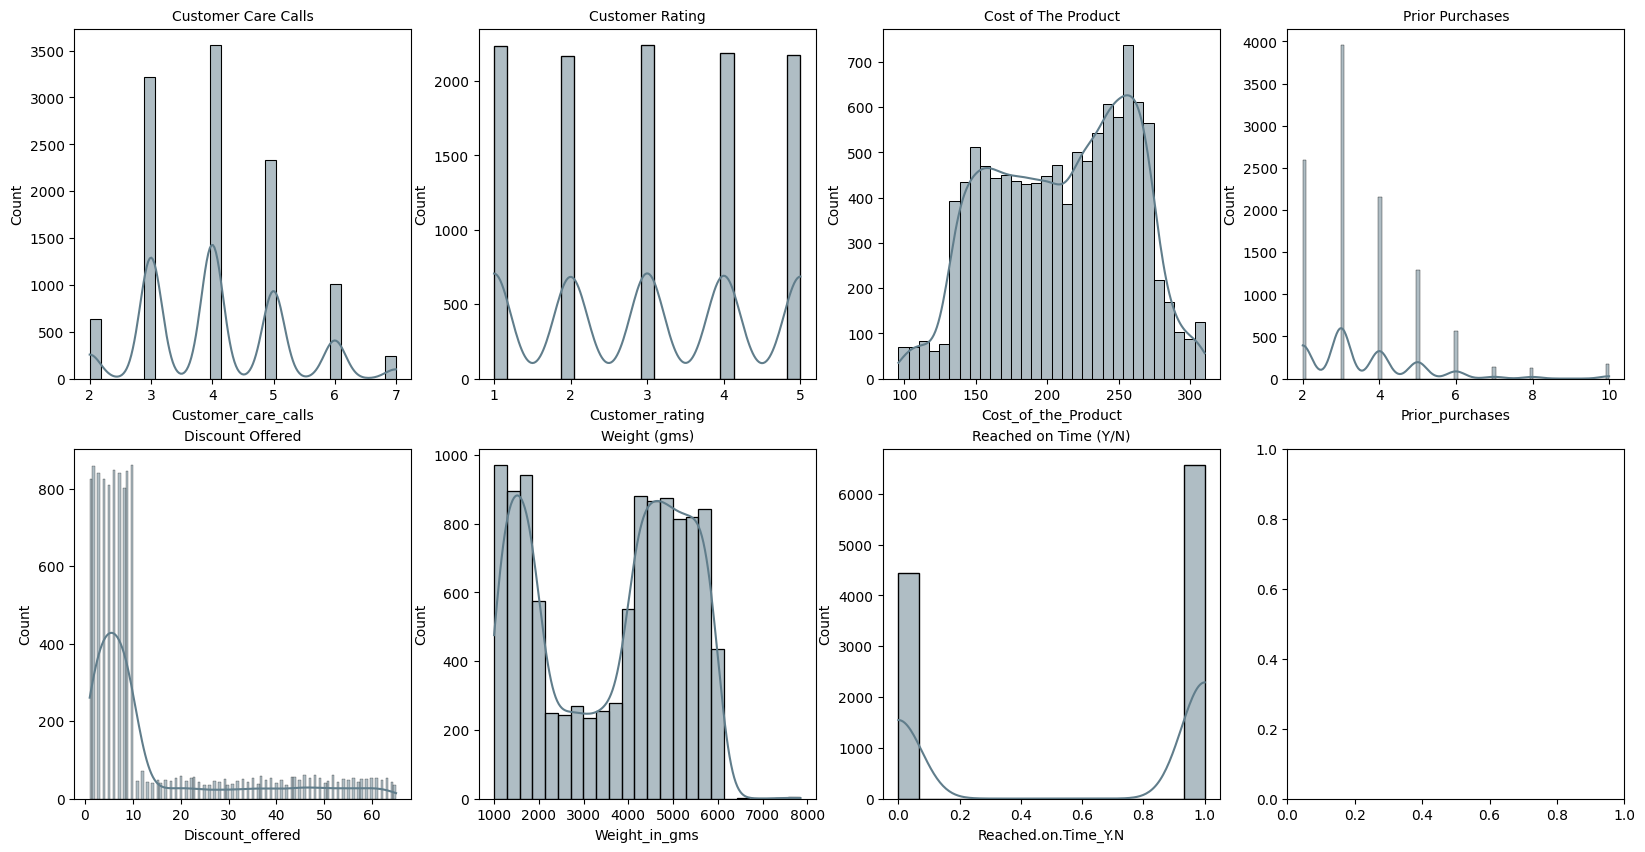

In [183]:
# Data Distribution
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))

cols = '#607D8B'

sns.histplot(data=df['Customer_care_calls'], kde=True, color=cols, ax=ax1)
sns.histplot(data=df['Customer_rating'], kde=True, color=cols, ax=ax2)
sns.histplot(data=df['Cost_of_the_Product'], kde=True, color=cols, ax=ax3)
sns.histplot(data=df['Prior_purchases'], kde=True, color=cols, ax=ax4)
sns.histplot(data=df['Discount_offered'], kde=True, color=cols, ax=ax5)
sns.histplot(data=df['Weight_in_gms'], kde=True, color=cols, ax=ax6)
sns.histplot(data=df['Reached.on.Time_Y.N'], kde=True, color=cols, ax=ax7)

ax1.set_title('Customer Care Calls', fontsize=10)
ax2.set_title('Customer Rating', fontsize=10)
ax3.set_title('Cost of The Product', fontsize=10)
ax4.set_title('Prior Purchases', fontsize=10)
ax5.set_title('Discount Offered', fontsize=10)
ax6.set_title('Weight (gms)', fontsize=10)
ax7.set_title('Reached on Time (Y/N)', fontsize=10)

plt.show()

In [184]:
from scipy.stats import normaltest

for column in df.describe().columns:
    stat, pvalue = normaltest(df[column])
    pvalue
    skew = df[column].skew()
    if pvalue > 0.05:
        print(f'{column} \npvalue = {pvalue:.5f}, we assume the data IS normally distributed.')
        if skew > 0.5:
            print(f'skew = {skew:.5f}, the data is right-skewed.\n')
        elif skew < -0.5:
            print(f'skew = {skew:.5f}, the data is left-skewed.\n')
        else:
            print(f'skew = {skew:.5f}, the data is symmetrical.\n')
    else:
        print(f'{column} \npvalue = {pvalue:.5f}, we assume the data is NOT normally distributed.')
        if skew > 0.5:
            print(f'skew = {skew:.5f}, the data is right-skewed.\n')
        elif skew < -0.5:
            print(f'skew = {skew:.5f}, the data is left-skewed.\n')
        else:
            print(f'skew = {skew:.5f}, the data is approximately symmetrical. There is possibility of the data having a uniform distribution.\n')

Customer_care_calls 
pvalue = 0.00000, we assume the data is NOT normally distributed.
skew = 0.39193, the data is approximately symmetrical. There is possibility of the data having a uniform distribution.

Customer_rating 
pvalue = 0.00000, we assume the data is NOT normally distributed.
skew = 0.00436, the data is approximately symmetrical. There is possibility of the data having a uniform distribution.

Cost_of_the_Product 
pvalue = 0.00000, we assume the data is NOT normally distributed.
skew = -0.15712, the data is approximately symmetrical. There is possibility of the data having a uniform distribution.

Prior_purchases 
pvalue = 0.00000, we assume the data is NOT normally distributed.
skew = 1.68190, the data is right-skewed.

Discount_offered 
pvalue = 0.00000, we assume the data is NOT normally distributed.
skew = 1.79893, the data is right-skewed.

Weight_in_gms 
pvalue = 0.00000, we assume the data is NOT normally distributed.
skew = -0.24975, the data is approximately symme

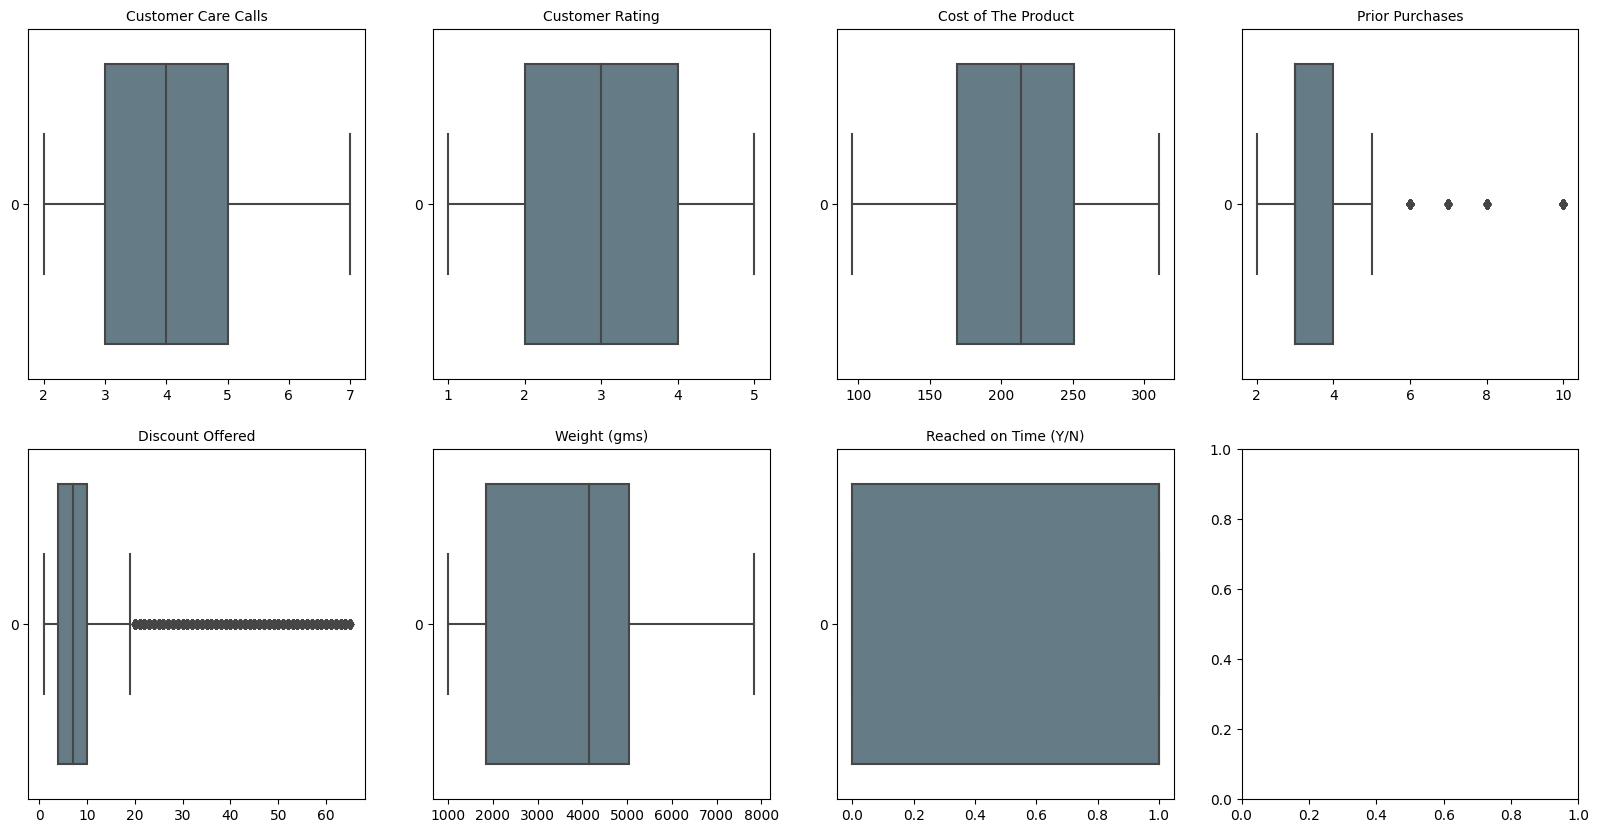

In [185]:
# Detect Outlier
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))

cols = '#607D8B'

sns.boxplot(data=df['Customer_care_calls'], orient="h", color=cols, ax=ax1)
sns.boxplot(data=df['Customer_rating'], orient="h", color=cols, ax=ax2)
sns.boxplot(data=df['Cost_of_the_Product'], orient="h", color=cols, ax=ax3)
sns.boxplot(data=df['Prior_purchases'], orient="h", color=cols, ax=ax4)
sns.boxplot(data=df['Discount_offered'], orient="h", color=cols, ax=ax5)
sns.boxplot(data=df['Weight_in_gms'], orient="h", color=cols, ax=ax6)
sns.boxplot(data=df['Reached.on.Time_Y.N'], orient="h", color=cols, ax=ax7)

ax1.set_title('Customer Care Calls', fontsize=10)
ax2.set_title('Customer Rating', fontsize=10)
ax3.set_title('Cost of The Product', fontsize=10)
ax4.set_title('Prior Purchases', fontsize=10)
ax5.set_title('Discount Offered', fontsize=10)
ax6.set_title('Weight (gms)', fontsize=10)
ax7.set_title('Reached on Time (Y/N)', fontsize=10)

plt.show()

**The histplot and boxplot visualizations above show that:**
- None of the columns are normally distributed when tested with normaltest.
- The columns `Prior_purchases`, and `Discount_offered` are not well distributed and skewed to the right. It indicates the mean is greater than the median.
- The columns `Customer_care_calls`, `Customer_rating`, `Cost_of_the_Product`, `Weight_in_gms`, and `Reached.on.Time_Y.N` are not weel distributed but have skewness between -0.5 and 0.5. According to [<font color='#B85048'><u>this article</u></font>](https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241) if skewness is between -0.5 and 0.5, the distribution is approximately symmetric. Thus, we can say that those columns have a uniform distribution.
- Outliers are found in the `Prior_purchases` and `Discount_offered `columns. Let us look into this further. Let's investigate further.


### **Handling Outliers**

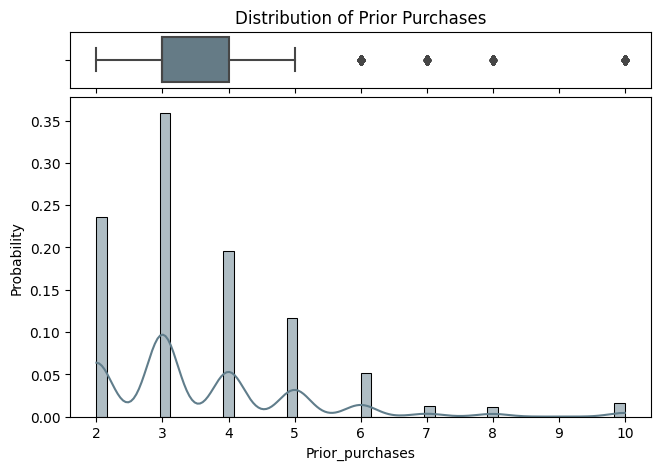

In [186]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5,5), gridspec_kw={'height_ratios':(.15, .85),'hspace':0.05})

ax1.set_title('Distribution of Prior Purchases')
sns.boxplot(x=df['Prior_purchases'], ax=ax1, color='#607D8B')
ax1.set(xlabel='')

sns.histplot(data=df['Prior_purchases'], ax=ax2, stat='probability', kde=True, bins=50, color='#607D8B')
plt.show()

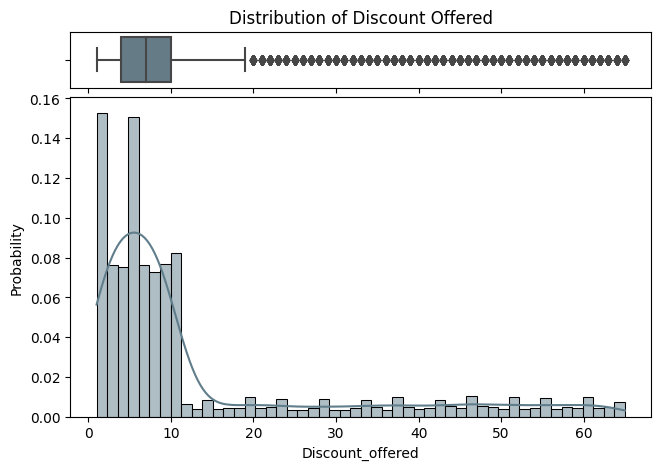

In [187]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5,5), gridspec_kw={'height_ratios':(.15, .85),'hspace':0.05})

ax1.set_title('Distribution of Discount Offered')
sns.boxplot(x=df['Discount_offered'], ax=ax1, color='#607D8B')
ax1.set(xlabel='')

sns.histplot(data=df['Discount_offered'], ax=ax2, stat='probability', kde=True, bins=50, color='#607D8B')
plt.show()

**According to the visualization above:**
- We don't need to drop the outliers of column `Prior_purchases` and `Discount_offered.`
- We still need the `Prior_purchases` column data to explore customer purchase behaviour.
- We still need the `Discount_offered` column data to explore the discount given by the company to the customer.

### **Feature Engineering**

In [188]:
# cost classes are divided based on the median limit value
df['Cost_class'] = ['cheap' if (x <= 169) else 'expensive' if (x >= 251) else 'normal' for x in df['Cost_of_the_Product'].values]

In [189]:
# discount class are divided in 5 class, so that discount is well classed
df['Discount_class'] = ['1-13(%)' if (x<=13) else '14-26(%)' if ((x>13) & (x<27)) else '27-39(%)' if ((x>26) & (x<40)) else '40-52(%)' if ((x>39) & (x<53)) else '53-65(%)' for x in df['Discount_offered'].values]

In [190]:
# weight classes are divided based on the median limit value
df['Weight_class'] = ['light' if (x <= 1839.5) else 'heavy' if (x >= 5050) else 'medium' for x in df['Weight_in_gms'].values]

In [191]:
# rating classes are divided based on rating under 3 and above 3
df['rating_class'] = ['low rating' if (x <= 3) else 'high rating' for x in df['Customer_rating'].values]

In [192]:
# Group customer care calls by intensity
df['call_intensity'] = ['few' if (x<=3) else 'moderate' if ((x>3)&(x<6)) else 'frequent' for x in df['Customer_care_calls'].values]

In [193]:
df['rating_class'] = ['low rating' if (x <= 3) else 'high rating' for x in df['Customer_rating'].values]

In [262]:
# Save to CSV for TABLEAU
df.to_csv('Online Retail Shipping Clean.csv')

****
# **Exploratory Data Analysis**
****

### **Value Counts of Categorical Columns**

In [194]:
df.describe(include=object)

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Cost_class,Discount_class,Weight_class,rating_class,call_intensity
count,10999,10999,10999,10999,10999,10999,10999,10999,10999
unique,5,3,3,2,3,5,3,2,3
top,E,Ship,low,F,normal,1-13(%),medium,low rating,moderate
freq,3666,7462,5297,5545,5470,8514,5498,6639,5885


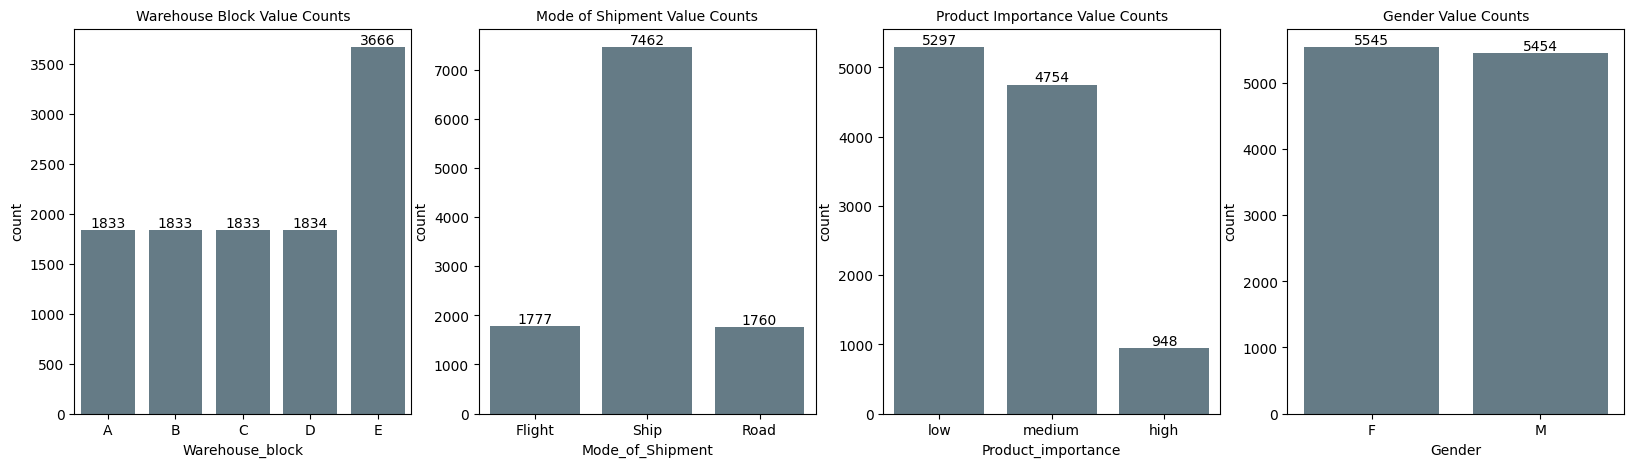

In [195]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))

cols = '#607D8B'

sns.countplot(x=df['Warehouse_block'], color=cols, ax=ax1, order=['A','B','C','D','E'])
sns.countplot(x=df['Mode_of_Shipment'], color=cols, ax=ax2)
sns.countplot(x=df['Product_importance'], color=cols, ax=ax3)
sns.countplot(x=df['Gender'], color=cols, ax=ax4)

ax1.set_title('Warehouse Block Value Counts', fontsize=10)
ax2.set_title('Mode of Shipment Value Counts', fontsize=10)
ax3.set_title('Product Importance Value Counts', fontsize=10)
ax4.set_title('Gender Value Counts', fontsize=10)

ax1.bar_label(ax1.containers[0], label_type='edge')
ax2.bar_label(ax2.containers[0], label_type='edge')
ax3.bar_label(ax3.containers[0], label_type='edge')
ax4.bar_label(ax4.containers[0], label_type='edge')

plt.show()

##### **INSIGHT 1**
****
**According to the analysis above we can conclude that:**
- There is a double amount (2x) of products in warehouse E compared to warehouses A, B, C, and D.
- Company prefer ship shipping over flight or road shipping.
- There are more low priority products rather than medium or high priority.
- There are slightly more female customers than male customers.

### **Reached on Time Analysis**

In [196]:
df_rt = df.groupby('Reached.on.Time_Y.N')[['Mode_of_Shipment']].count().reset_index().rename(columns={'Mode_of_Shipment':'count'})
df_rt

,Reached.on.Time_Y.N,count
0,0,4436
1,1,6563


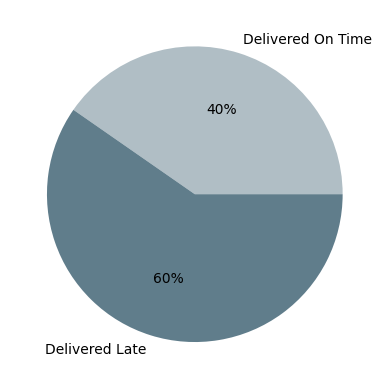

In [197]:
plt.pie(df_rt['count'], labels=['Delivered On Time', 'Delivered Late'], autopct='%.0f%%', colors=['#B0BEC5','#607D8B'])
plt.show()

**Categorical**

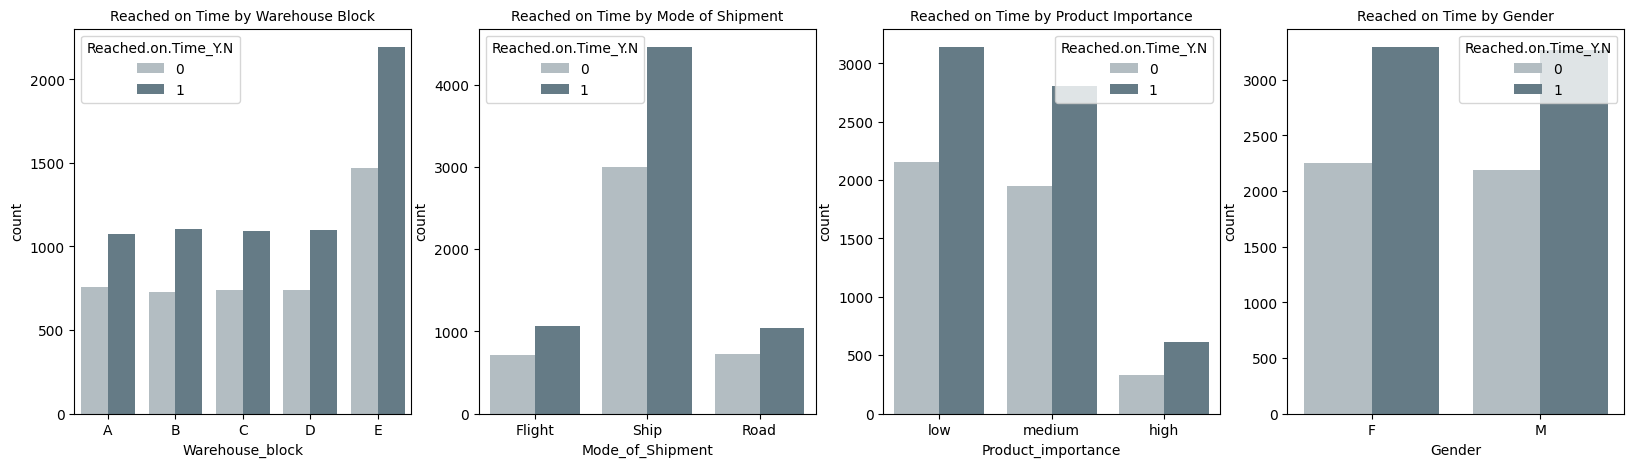

In [198]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))

cols = ['#B0BEC5','#607D8B']

sns.countplot(data=df, x='Warehouse_block', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax1, order=['A','B','C','D','E'])
sns.countplot(data=df, x='Mode_of_Shipment', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax2)
sns.countplot(data=df, x='Product_importance', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax3)
sns.countplot(data=df, x='Gender', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax4)

ax1.set_title('Reached on Time by Warehouse Block', fontsize=10)
ax2.set_title('Reached on Time by Mode of Shipment', fontsize=10)
ax3.set_title('Reached on Time by Product Importance', fontsize=10)
ax4.set_title('Reached on Time by Gender', fontsize=10)

plt.show()

**Numerical**

In [199]:
df[df.describe().columns]

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1
...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1
10995,4,1,232,5,6,1247,0
10996,5,4,242,5,4,1155,0
10997,5,2,223,6,2,1210,0


**Convert Numeric Column with Many Distinct Values to a Class**

In [200]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


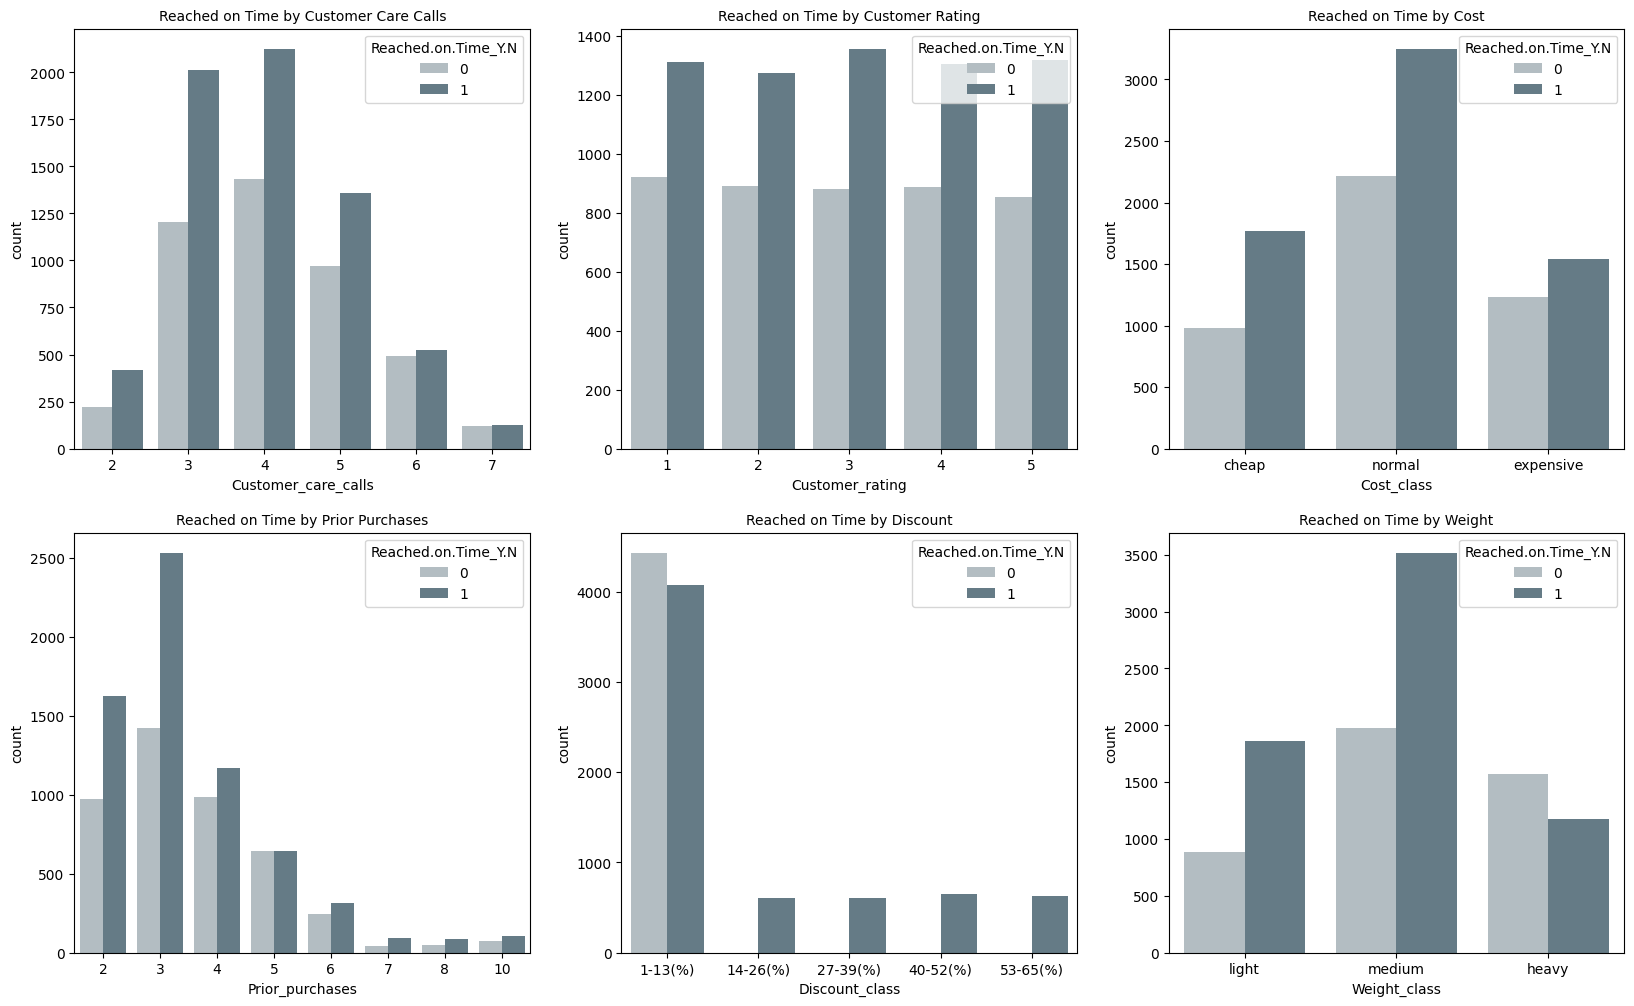

In [201]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize = (20,12))

cols = ['#B0BEC5','#607D8B']

sns.countplot(data=df, x='Customer_care_calls', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax1)
sns.countplot(data=df, x='Customer_rating', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax2)
sns.countplot(data=df, x='Cost_class', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax3, order=['cheap','normal','expensive'])
sns.countplot(data=df, x='Prior_purchases', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax4)
sns.countplot(data=df, x='Discount_class', hue ='Reached.on.Time_Y.N', palette=cols, order=['1-13(%)', '14-26(%)', '27-39(%)', '40-52(%)', '53-65(%)'], ax=ax5)
sns.countplot(data=df, x='Weight_class', hue ='Reached.on.Time_Y.N', palette=cols, ax=ax6)

ax1.set_title('Reached on Time by Customer Care Calls', fontsize=10)
ax2.set_title('Reached on Time by Customer Rating', fontsize=10)
ax3.set_title('Reached on Time by Cost', fontsize=10)
ax4.set_title('Reached on Time by Prior Purchases', fontsize=10)
ax5.set_title('Reached on Time by Discount', fontsize=10)
ax6.set_title('Reached on Time by Weight', fontsize=10)

plt.show()

**Reached On Time by Weight**

In [202]:
df_light = df[df['Weight_class'] == 'light']
df_medium = df[df['Weight_class'] == 'medium']
df_heavy = df[df['Weight_class'] == 'heavy']

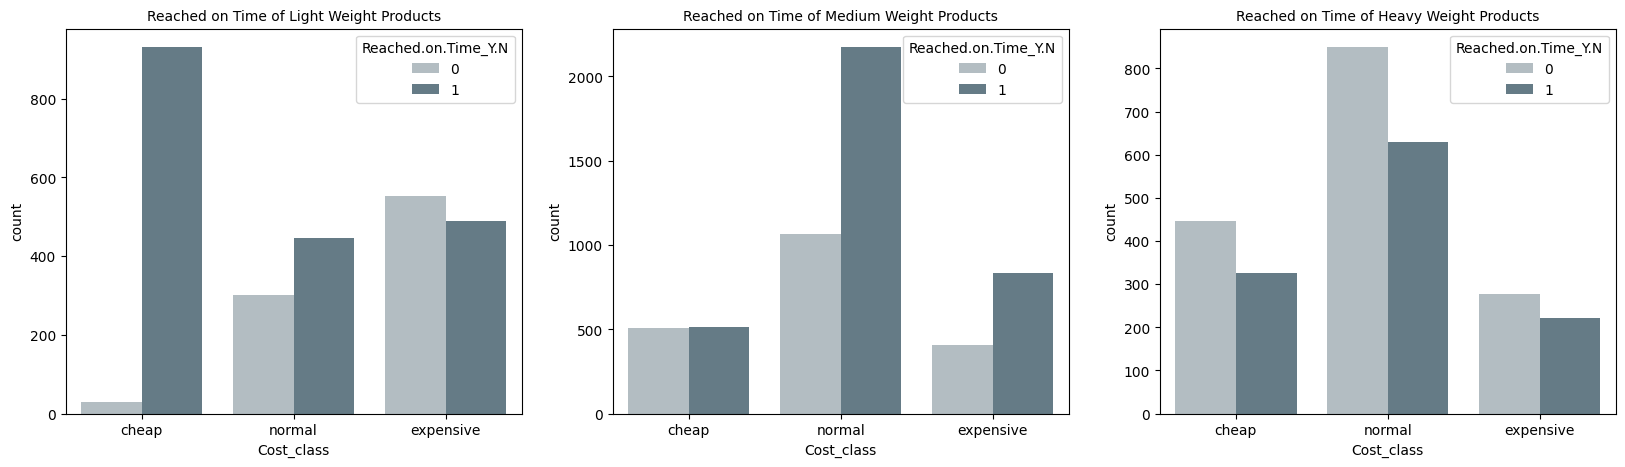

In [203]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))

cols = ['#B0BEC5','#607D8B']

sns.countplot(data=df_light, x='Cost_class', hue ='Reached.on.Time_Y.N', palette=cols, order=['cheap','normal','expensive'], ax=ax1)
sns.countplot(data=df_medium, x='Cost_class', hue ='Reached.on.Time_Y.N', palette=cols, order=['cheap','normal','expensive'], ax=ax2)
sns.countplot(data=df_heavy, x='Cost_class', hue ='Reached.on.Time_Y.N', palette=cols, order=['cheap','normal','expensive'], ax=ax3)

ax1.set_title('Reached on Time of Light Weight Products', fontsize=10)
ax2.set_title('Reached on Time of Medium Weight Products', fontsize=10)
ax3.set_title('Reached on Time of Heavy Weight Products', fontsize=10)

plt.show()

##### **INSIGHT 2**
****
**According to the analysis above we can conclude that:**
- Overall, there are more products that delivered late (1) than on time (0). 60% products are delivered late, 40% products are delivered on time.
- Exception for heavy weight products and low discount products below 13%, which have more products that delivered on time (0) than late (1).
- Shipment by ship tends to experience late delivery.

### **Customer Care Calls Analysis**

In [204]:
df_corr = df.corr(numeric_only=True, method='spearman')
df_corr[['Customer_care_calls']]

,Customer_care_calls
Customer_care_calls,1.000000
Customer_rating,0.011862
Cost_of_the_Product,0.293700
Prior_purchases,0.272992
Discount_offered,-0.104223
Weight_in_gms,-0.232936
Reached.on.Time_Y.N,-0.064283


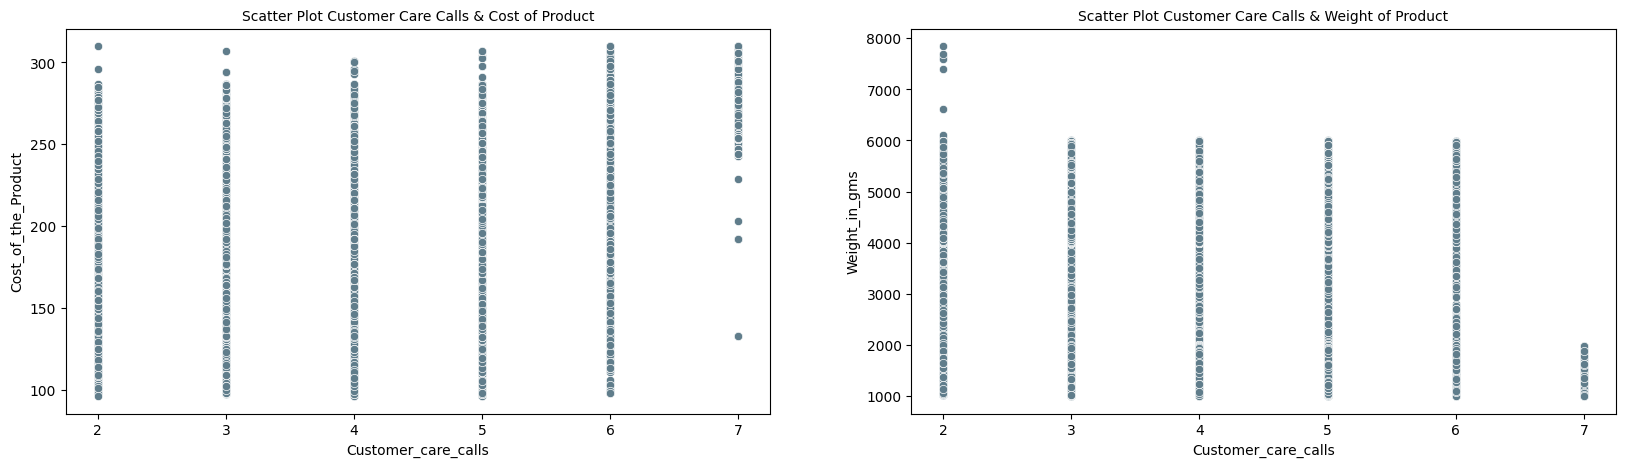

In [205]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.scatterplot(data=df, x='Customer_care_calls', y='Cost_of_the_Product', color='#607D8B', ax=ax1)
sns.scatterplot(data=df, x='Customer_care_calls', y='Weight_in_gms', color='#607D8B', ax=ax2)

ax1.set_title('Scatter Plot Customer Care Calls & Cost of Product', fontsize=10)
ax2.set_title('Scatter Plot Customer Care Calls & Weight of Product', fontsize=10)

plt.show()

##### **INSIGHT 3**
****
**According to the analysis above we can conclude that:**
- `Customer_care_calls` have the **highest positive correlation** of 0.2937 with `Cost_of_the_Product`, possibly indicating that the **higher the product cost**, the more calls received to inquire about shipment.
- `Customer_care_calls` have the **highest negative correlation** of 0.232936 with `Weight_in_gms`, possibly indicating that the **lighter the weight** of the products, the more calls received to inquire about shipment.

**Customer Care Calls & Intensity Value Counts**

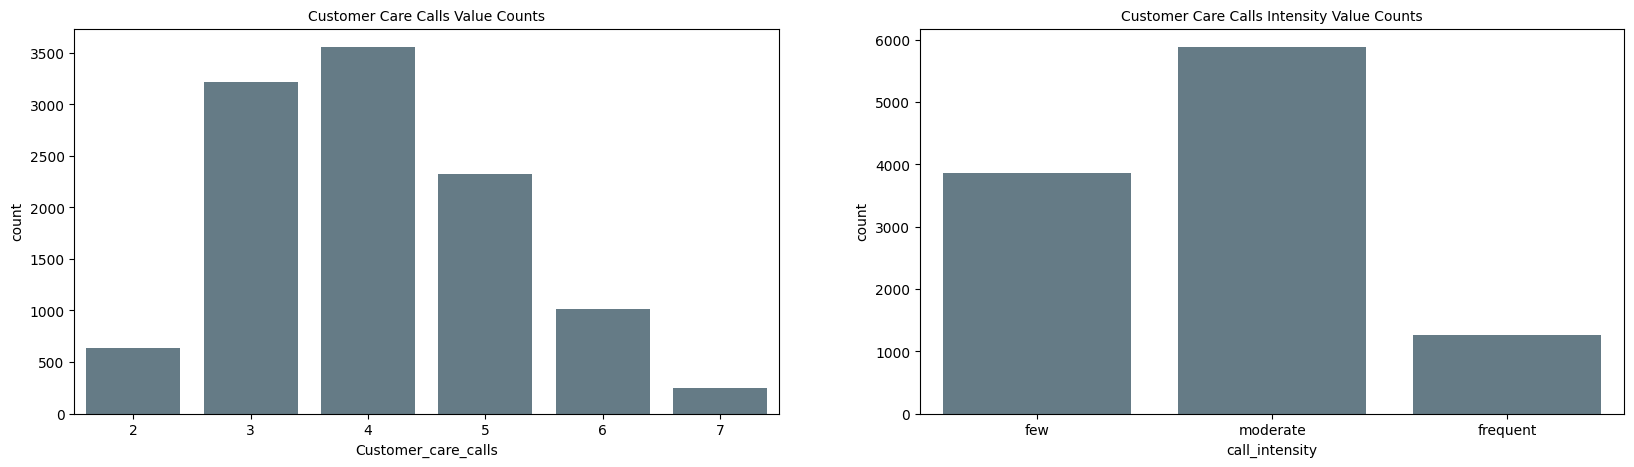

In [206]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.countplot(x=df['Customer_care_calls'], color='#607D8B', ax=ax1)
sns.countplot(x=df['call_intensity'], color='#607D8B', order=['few','moderate','frequent'], ax=ax2)

ax1.set_title('Customer Care Calls Value Counts', fontsize=10)
ax2.set_title('Customer Care Calls Intensity Value Counts', fontsize=10)

plt.show()

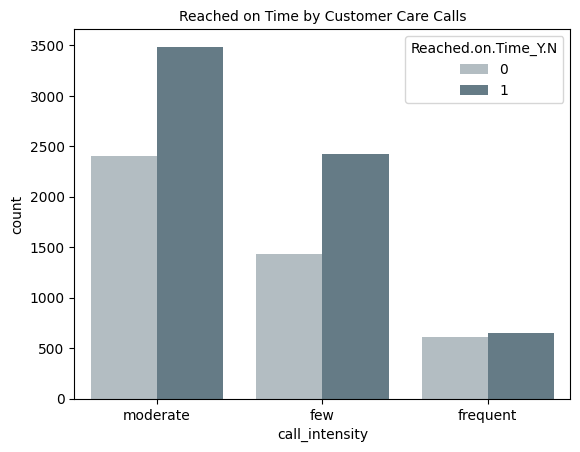

In [207]:
sns.countplot(data=df, x='call_intensity', hue ='Reached.on.Time_Y.N', palette=['#B0BEC5','#607D8B'])
plt.title('Reached on Time by Customer Care Calls', fontsize=10)
plt.show()

##### **INSIGHT 4**
****
**According to the analysis above we can conclude that:**
- Products that arrive late receive more customer care calls than products that arrive on time.
- The highest intensity of customer care calls for inquiries is moderate calls (4-5 calls).
- Customer rarely made a frequent calls more than 5 calls.

**Customer Care Calls by Warehouse Block**

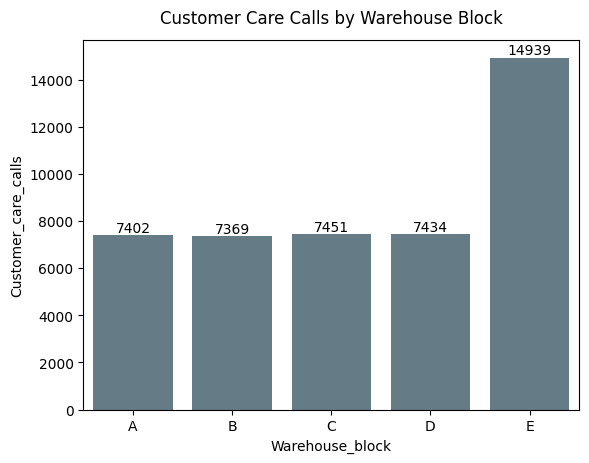

In [208]:
ax1 = sns.barplot(data=df.groupby('Warehouse_block')[['Customer_care_calls']].sum().reset_index(), x='Warehouse_block', y='Customer_care_calls', color='#607D8B')
ax1.bar_label(ax1.containers[0], label_type='edge')
plt.title('Customer Care Calls by Warehouse Block', pad=12)
plt.show()

In [209]:
wb_cc = df.groupby(['Warehouse_block','Cost_class'])[['Mode_of_Shipment']].count().reset_index().rename(columns={'Mode_of_Shipment':'count'})
wb_cc.head()

,Warehouse_block,Cost_class,count
0,A,cheap,482
1,A,expensive,456
2,A,normal,895
3,B,cheap,416
4,B,expensive,460


In [210]:
wb_wg = df.groupby(['Warehouse_block','Weight_class'])[['Mode_of_Shipment']].count().reset_index().rename(columns={'Mode_of_Shipment':'count'})
wb_wg.head()

,Warehouse_block,Weight_class,count
0,A,heavy,458
1,A,light,485
2,A,medium,890
3,B,heavy,469
4,B,light,464


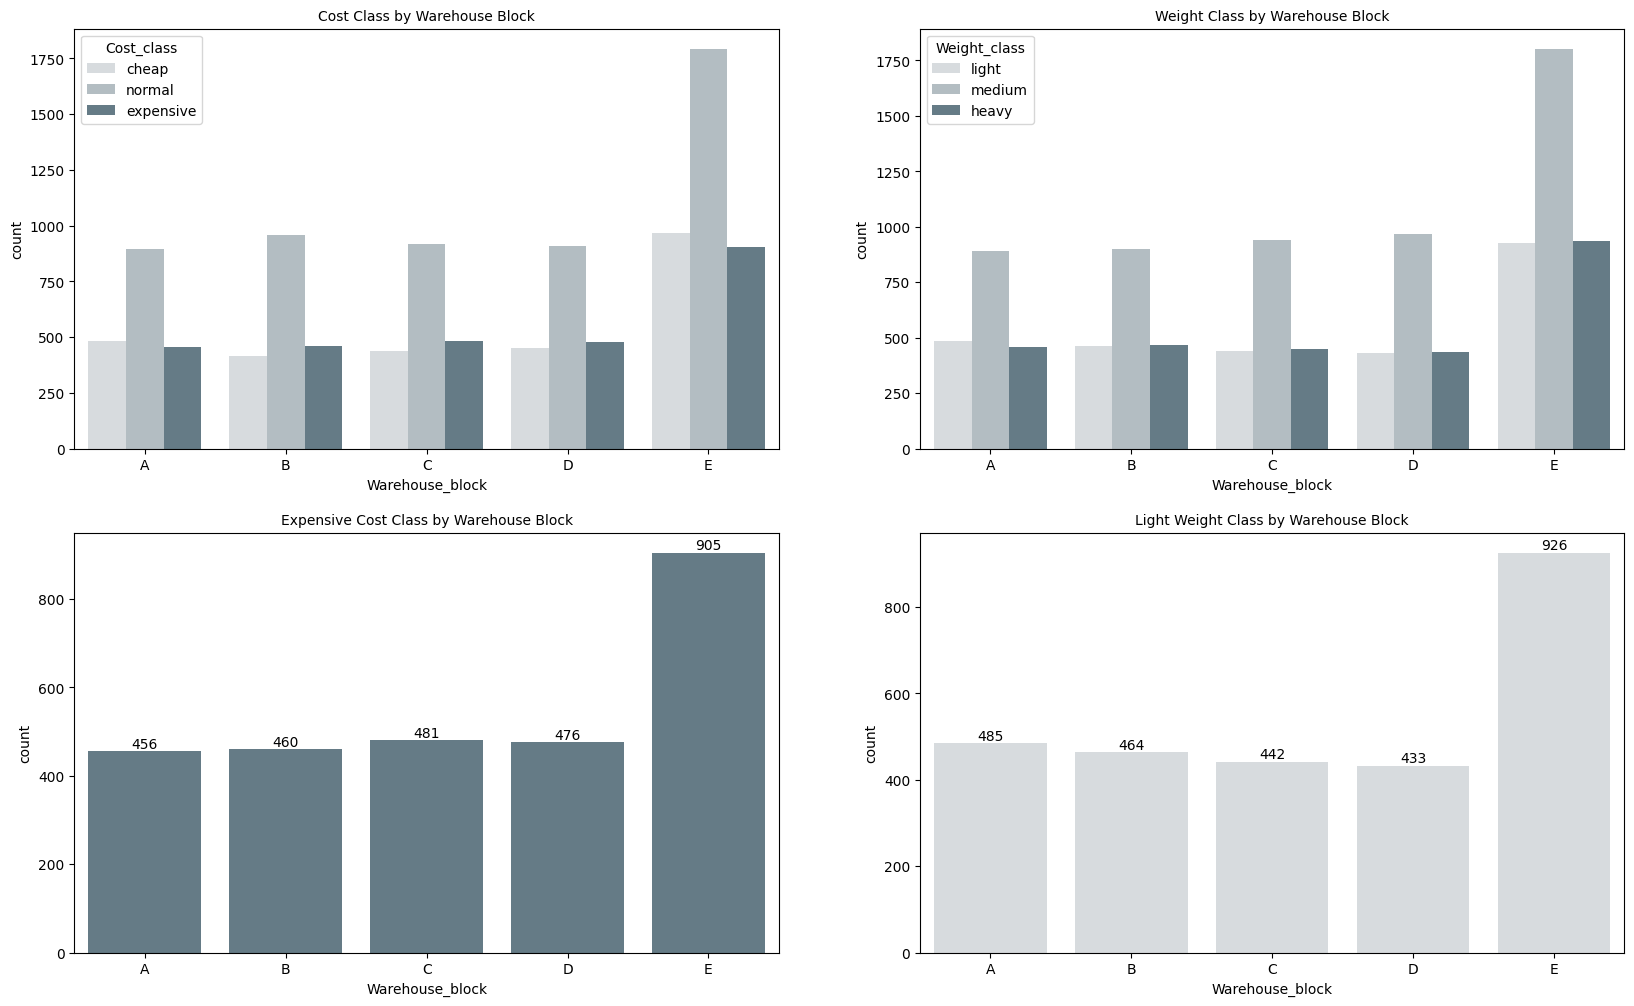

In [211]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))

sns.barplot(data=wb_cc, x='Warehouse_block', y='count', hue='Cost_class', palette=['#D6DBDF','#B0BEC5','#607D8B'], ax=ax1, hue_order=['cheap','normal','expensive'])
sns.barplot(data=wb_wg, x='Warehouse_block', y='count', hue='Weight_class', palette=['#D6DBDF','#B0BEC5','#607D8B'], hue_order=['light','medium','heavy'], ax=ax2)
sns.barplot(data=wb_cc[wb_cc['Cost_class'] == 'expensive'], x='Warehouse_block', y='count', color='#607D8B', ax=ax3)
sns.barplot(data=wb_wg[wb_wg['Weight_class'] == 'light'], x='Warehouse_block', y='count', color='#D6DBDF', ax=ax4)


ax1.set_title('Cost Class by Warehouse Block', fontsize=10)
ax2.set_title('Weight Class by Warehouse Block', fontsize=10)
ax3.set_title('Expensive Cost Class by Warehouse Block', fontsize=10)
ax4.set_title('Light Weight Class by Warehouse Block', fontsize=10)

ax3.bar_label(ax3.containers[0], label_type='edge')
ax4.bar_label(ax4.containers[0], label_type='edge')

plt.show()

In [212]:
wcc_int = df.groupby(['Warehouse_block','call_intensity'])[['Mode_of_Shipment']].count().reset_index().rename(columns={'Mode_of_Shipment':'count'})
wcc_int.head()

,Warehouse_block,call_intensity,count
0,A,few,658
1,A,frequent,210
2,A,moderate,965
3,B,few,653
4,B,frequent,184


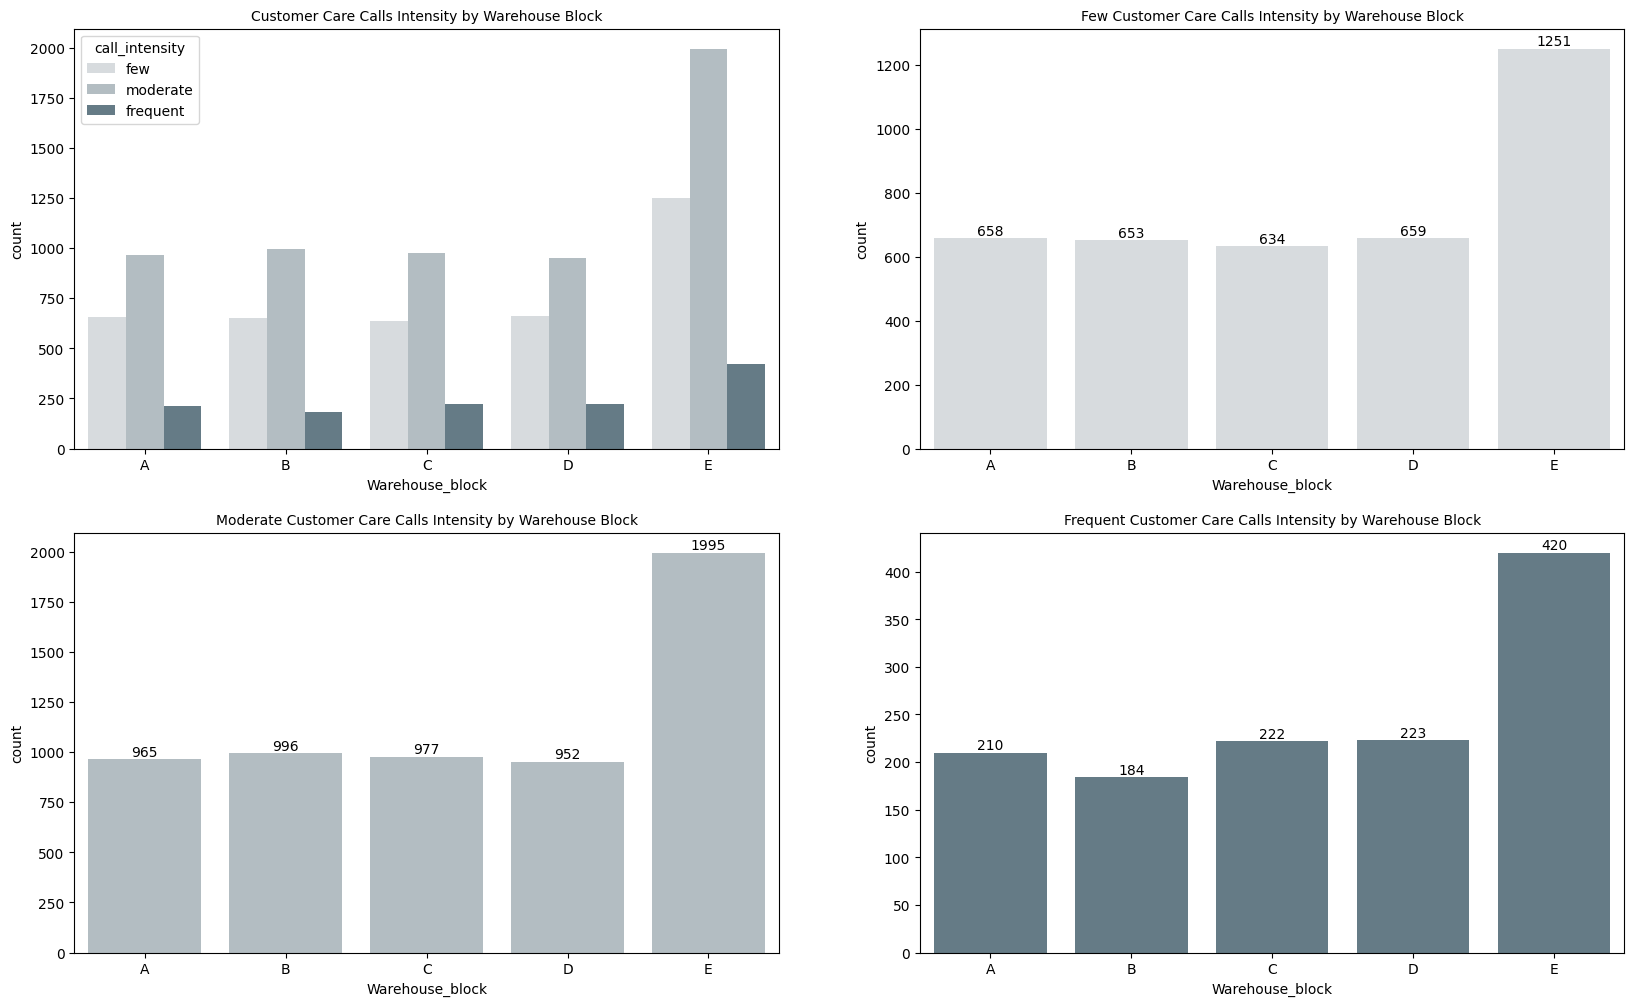

In [213]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))

sns.barplot(data=wcc_int, x='Warehouse_block', y='count',hue='call_intensity', palette=['#D6DBDF','#B0BEC5','#607D8B'], ax=ax1, hue_order=['few','moderate','frequent'])
sns.barplot(data=wcc_int[wcc_int['call_intensity'] == 'few'], x='Warehouse_block', y='count', color='#D6DBDF', ax=ax2)
sns.barplot(data=wcc_int[wcc_int['call_intensity'] == 'moderate'], x='Warehouse_block', y='count', color='#B0BEC5', ax=ax3)
sns.barplot(data=wcc_int[wcc_int['call_intensity'] == 'frequent'], x='Warehouse_block', y='count', color='#607D8B', ax=ax4)

ax1.set_title('Customer Care Calls Intensity by Warehouse Block', fontsize=10)
ax2.set_title('Few Customer Care Calls Intensity by Warehouse Block', fontsize=10)
ax3.set_title('Moderate Customer Care Calls Intensity by Warehouse Block', fontsize=10)
ax4.set_title('Frequent Customer Care Calls Intensity by Warehouse Block', fontsize=10)

ax2.bar_label(ax2.containers[0], label_type='edge')
ax3.bar_label(ax3.containers[0], label_type='edge')
ax4.bar_label(ax4.containers[0], label_type='edge')

plt.show()

##### **INSIGHT 5**
****
**According to the analysis above we can conclude that:**
- Warehouse E receives the most customer service calls for inquiries because it has the most product amounts.
- Warehouse C received the most customer service calls for inquiries despite having the same amount of product amounts as Warehouses A, B, and D.
- With the same amount of products, Warehouse D answered more than 5 times care calls from the same customer as Warehouses A, B, and C.
- These happens because Warehouse C and D have more expensive cost products than A and B, so the Warehouse C and D received more calls from customer to inquire about the shipment.
<br><br>
- Although Warehouse A has more lighter weight products than Warehouses B, C, and D, Warehouse A has the fewest expensive cost products of the three.
- Meanwhile, the correlation between cost products and customer care calls is higher than the correlation between product weight and customer care calls.

### **Product Importance Analysis**

In [214]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_class,Discount_class,Weight_class,rating_class,call_intensity
0,D,Flight,4,2,177,3,low,F,44,1233,1,normal,40-52(%),light,low rating,moderate
1,E,Flight,4,5,216,2,low,M,59,3088,1,normal,53-65(%),medium,high rating,moderate
2,A,Flight,2,2,183,4,low,M,48,3374,1,normal,40-52(%),medium,low rating,few
3,B,Flight,3,3,176,4,medium,M,10,1177,1,normal,1-13(%),light,low rating,few
4,C,Flight,2,2,184,3,medium,F,46,2484,1,normal,40-52(%),medium,low rating,few


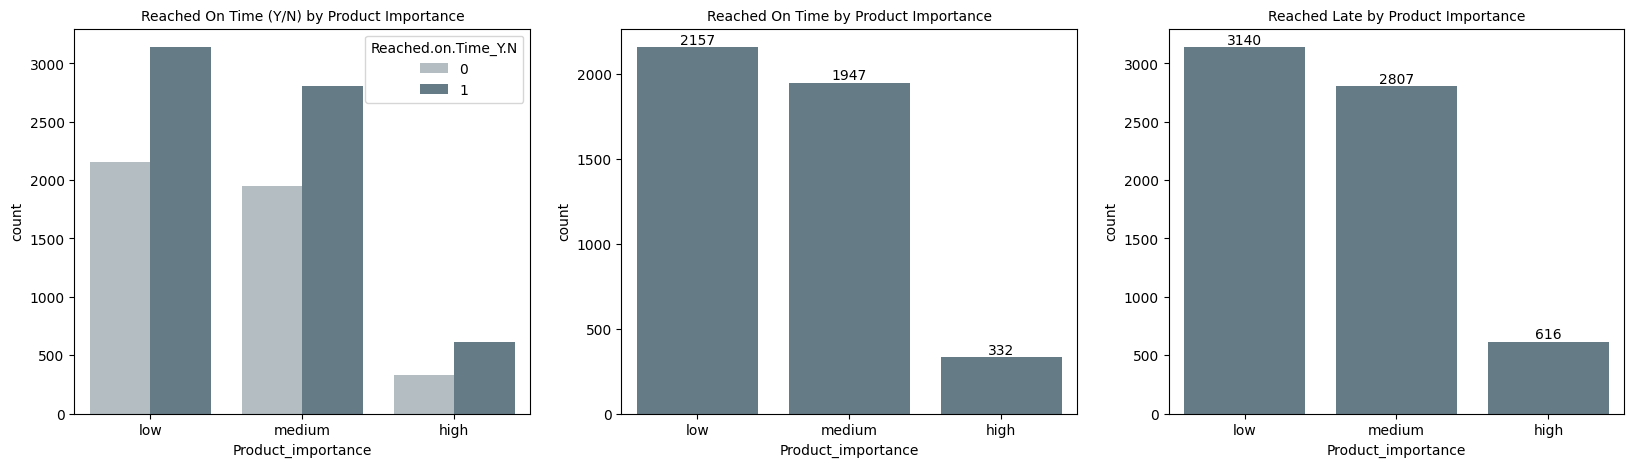

In [215]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))

sns.countplot(data=df, x='Product_importance', hue ='Reached.on.Time_Y.N', palette=['#B0BEC5','#607D8B'], ax=ax1)
sns.countplot(data=df[df['Reached.on.Time_Y.N'] == 0], x='Product_importance', color='#607D8B', order=['low','medium','high'],ax=ax2)
sns.countplot(data=df[df['Reached.on.Time_Y.N'] == 1], x='Product_importance', color='#607D8B', order=['low','medium','high'],ax=ax3)

ax1.set_title('Reached On Time (Y/N) by Product Importance', fontsize=10)
ax2.set_title('Reached On Time by Product Importance', fontsize=10)
ax3.set_title('Reached Late by Product Importance', fontsize=10)

ax2.bar_label(ax2.containers[0], label_type='edge')
ax3.bar_label(ax3.containers[0], label_type='edge')

plt.show()

In [216]:
print(f'Ratio of reached on time and late (Low Product Importance) -> {2157/2157:.1f} : {3140/2157:.1f}')
print(f'Ratio of reached on time and late (Medium Product Importance) -> {1947/1947:.1f} : {2807/1947:.1f}')
print(f'Ratio of reached on time and late (High Product Importance) -> {332/332:.1f} : {616/332:.1f}')

Ratio of reached on time and late (Low Product Importance) -> 1.0 : 1.5
Ratio of reached on time and late (Medium Product Importance) -> 1.0 : 1.4
Ratio of reached on time and late (High Product Importance) -> 1.0 : 1.9


In [217]:
wb_pi = df.groupby(['Warehouse_block','Product_importance'])[['Mode_of_Shipment']].count().reset_index().rename(columns={'Mode_of_Shipment':'count'})
wb_pi.head()

,Warehouse_block,Product_importance,count
0,A,high,165
1,A,low,909
2,A,medium,759
3,B,high,146
4,B,low,855


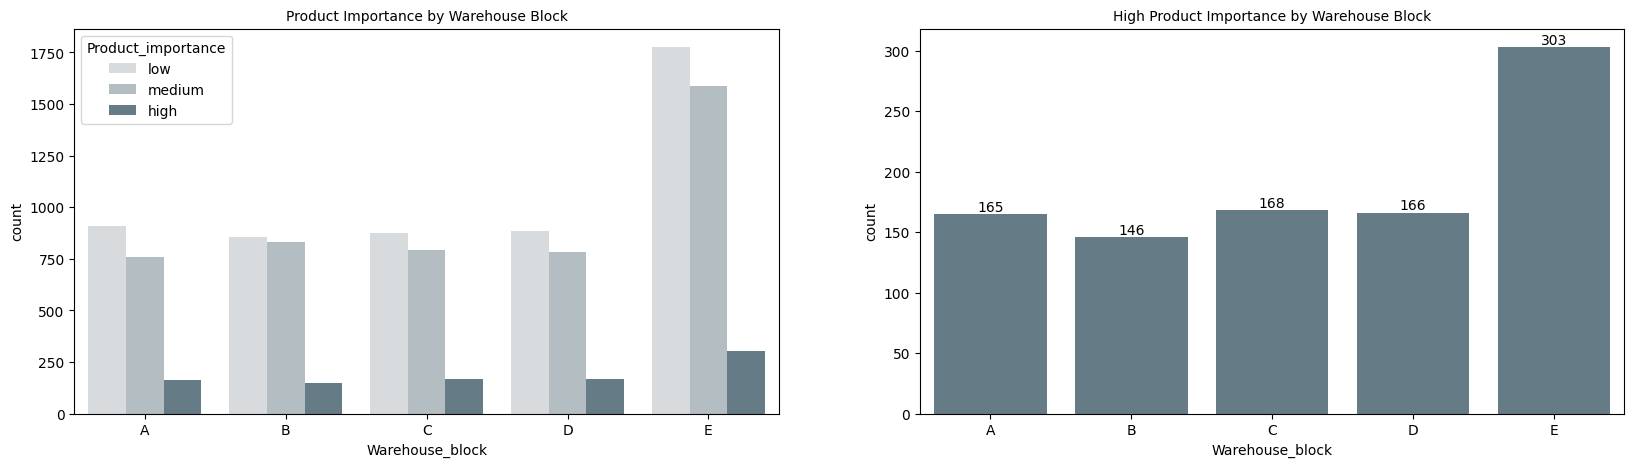

In [218]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.barplot(data=wb_pi, x='Warehouse_block', y='count', hue='Product_importance', palette=['#D6DBDF','#B0BEC5','#607D8B'], hue_order=['low','medium','high'], ax=ax1)
sns.barplot(data=wb_pi[wb_pi['Product_importance'] == 'high'], x='Warehouse_block', y='count', color='#607D8B', ax=ax2)

ax1.set_title('Product Importance by Warehouse Block', fontsize=10)
ax2.set_title('High Product Importance by Warehouse Block', fontsize=10)

ax2.bar_label(ax2.containers[0], label_type='edge')

plt.show()

In [219]:
ms_pi = df.groupby(['Mode_of_Shipment','Product_importance'])[['Warehouse_block']].count().reset_index().rename(columns={'Warehouse_block':'count'})
ms_pi.head()

,Mode_of_Shipment,Product_importance,count
0,Flight,high,163
1,Flight,low,838
2,Flight,medium,776
3,Road,high,158
4,Road,low,857


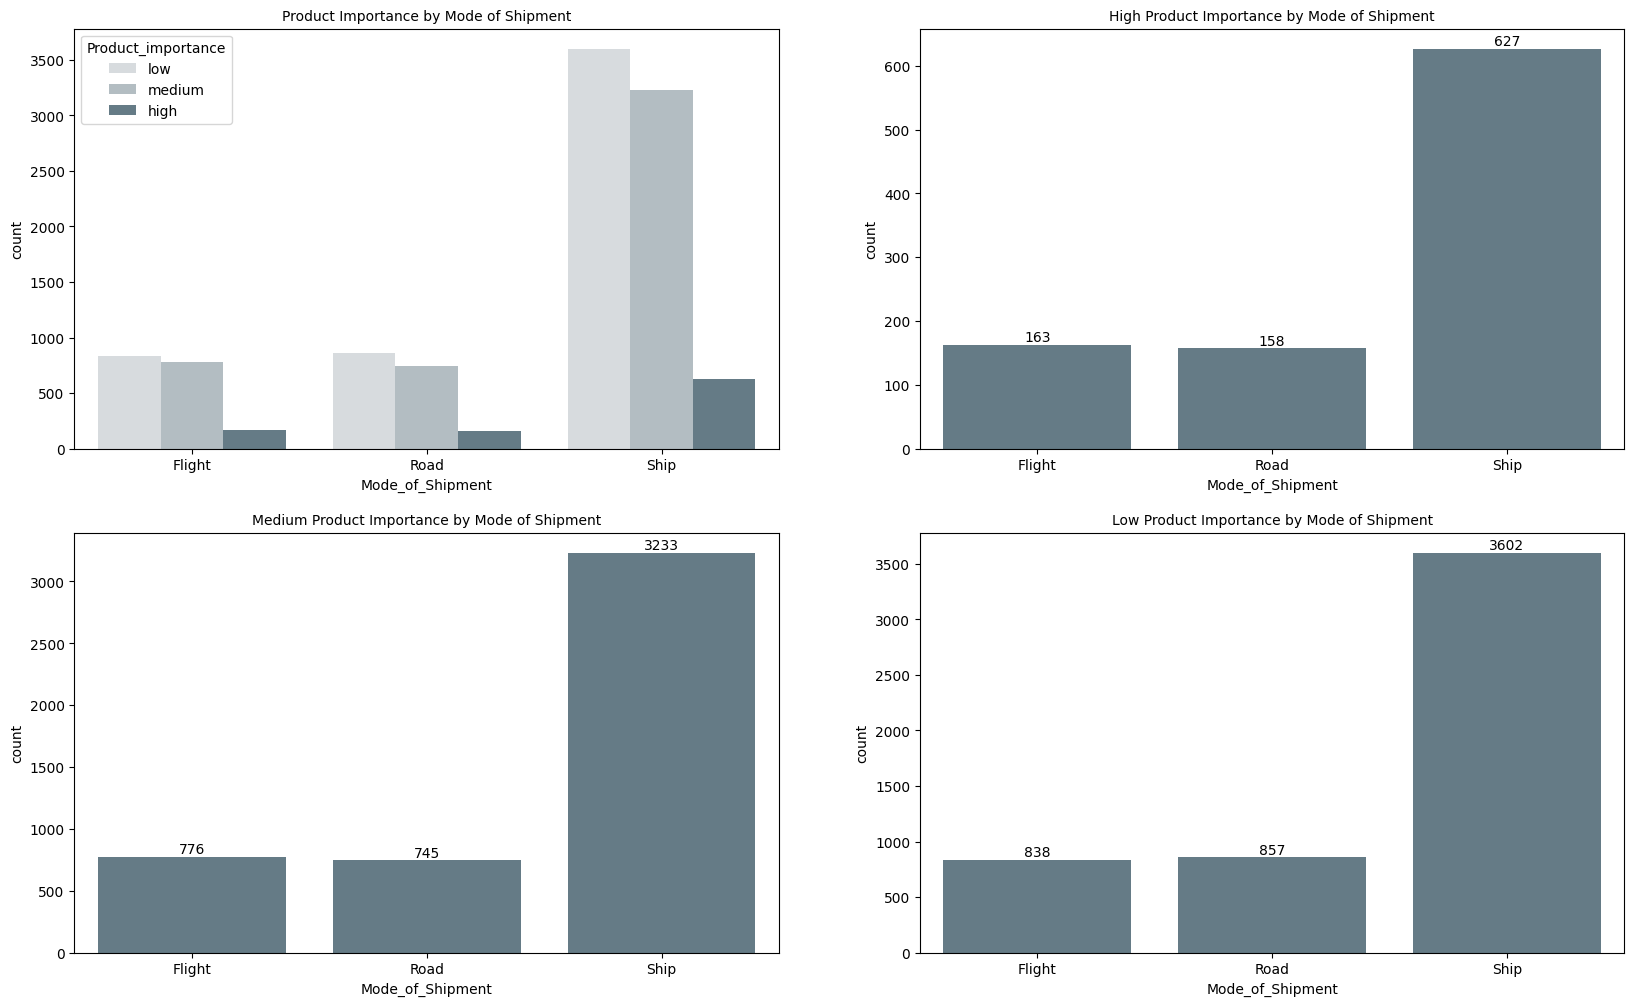

In [220]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))

sns.barplot(data=ms_pi, x='Mode_of_Shipment', y='count', hue='Product_importance', palette=['#D6DBDF','#B0BEC5','#607D8B'], hue_order=['low','medium','high'], ax=ax1)
sns.barplot(data=ms_pi[ms_pi['Product_importance'] == 'high'], x='Mode_of_Shipment', y='count', color='#607D8B', ax=ax2)
sns.barplot(data=ms_pi[ms_pi['Product_importance'] == 'medium'], x='Mode_of_Shipment', y='count', color='#607D8B', ax=ax3)
sns.barplot(data=ms_pi[ms_pi['Product_importance'] == 'low'], x='Mode_of_Shipment', y='count', color='#607D8B', ax=ax4)

ax1.set_title('Product Importance by Mode of Shipment', fontsize=10)
ax2.set_title('High Product Importance by Mode of Shipment', fontsize=10)
ax3.set_title('Medium Product Importance by Mode of Shipment', fontsize=10)
ax4.set_title('Low Product Importance by Mode of Shipment', fontsize=10)

ax2.bar_label(ax2.containers[0], label_type='edge')
ax3.bar_label(ax3.containers[0], label_type='edge')
ax4.bar_label(ax4.containers[0], label_type='edge')

plt.show()

In [221]:
df.groupby('Product_importance')['Customer_rating'].median()

Product_importance
high      3.0
low       3.0
medium    3.0
Name: Customer_rating, dtype: float64

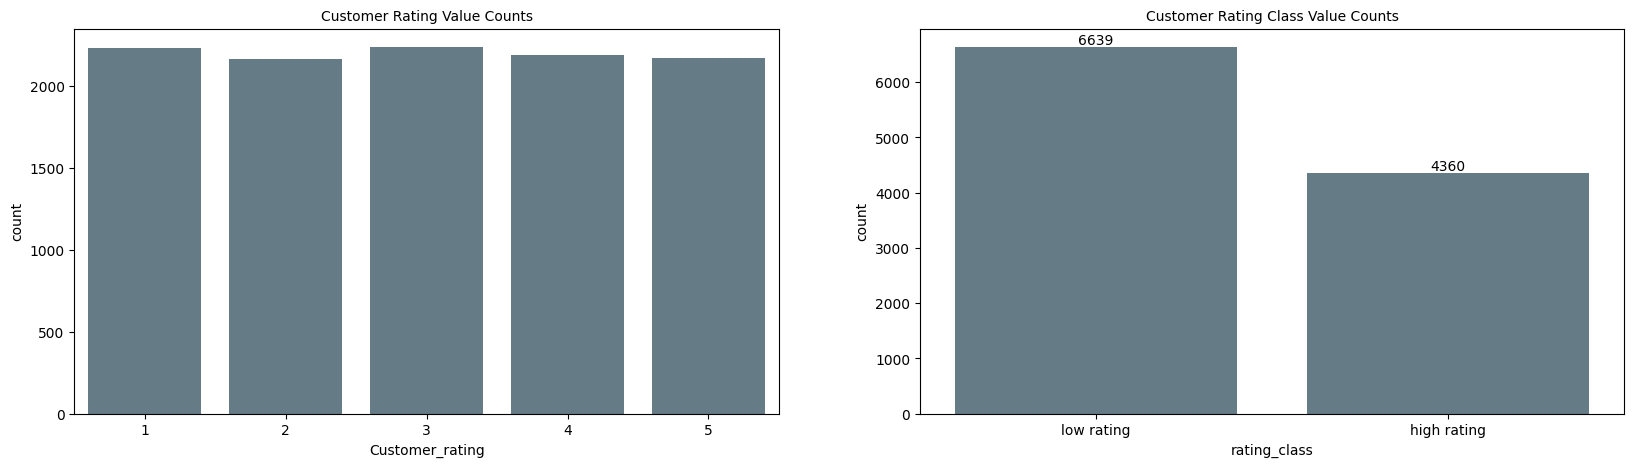

In [222]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.countplot(x=df['Customer_rating'], color='#607D8B', ax=ax1)
sns.countplot(x=df['rating_class'], color='#607D8B', ax=ax2)

ax1.set_title('Customer Rating Value Counts', fontsize=10)
ax2.set_title('Customer Rating Class Value Counts', fontsize=10)

ax2.bar_label(ax2.containers[0], label_type='edge')

plt.show()

In [223]:
df_ontime = df[df['Reached.on.Time_Y.N'] == 0].sort_values(by='Warehouse_block').reset_index(drop=True)
df_ontime.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_class,Discount_class,Weight_class,rating_class,call_intensity
0,A,Ship,3,2,182,10,low,M,1,4303,0,normal,1-13(%),medium,low rating,few
1,A,Road,3,1,151,2,low,F,7,4437,0,cheap,1-13(%),medium,low rating,few
2,A,Ship,3,4,212,3,medium,M,10,4663,0,normal,1-13(%),medium,high rating,few
3,A,Road,4,2,144,3,low,M,2,4264,0,cheap,1-13(%),medium,low rating,moderate
4,A,Ship,4,5,164,2,low,F,9,5453,0,cheap,1-13(%),heavy,high rating,moderate


In [224]:
df_ontime.groupby(['Product_importance','rating_class'])[['Warehouse_block']].count().reset_index().rename(columns={'Warehouse_block':'count'})

,Product_importance,rating_class,count
0,high,high rating,133
1,high,low rating,199
2,low,high rating,861
3,low,low rating,1296
4,medium,high rating,746
5,medium,low rating,1201


##### **INSIGHT 6**
****
**According to the analysis above we can conclude that:**
- The company did not handled the product well, even if the product importance is high.
- Most of products are delivered late than on time.
- The ratio of high important products delivered on time to products arrived late is 1 : 1.9, indicating that the number of products delivered late is 1.9 times the number of products delivered on time. This result is higher than low or medium important products.
- The majority of high important products are kept in Warehouse C.
- If the product importance is high or medium, flight mode shipment is preferred. If product importance is low, road shipment is preferred.
- All type of product importance have the same rating median of 3.0. Low ratings are more dominant than high ratings.


### **Cost of Product Analysis**

In [225]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_class,Discount_class,Weight_class,rating_class,call_intensity
0,D,Flight,4,2,177,3,low,F,44,1233,1,normal,40-52(%),light,low rating,moderate
1,E,Flight,4,5,216,2,low,M,59,3088,1,normal,53-65(%),medium,high rating,moderate
2,A,Flight,2,2,183,4,low,M,48,3374,1,normal,40-52(%),medium,low rating,few
3,B,Flight,3,3,176,4,medium,M,10,1177,1,normal,1-13(%),light,low rating,few
4,C,Flight,2,2,184,3,medium,F,46,2484,1,normal,40-52(%),medium,low rating,few


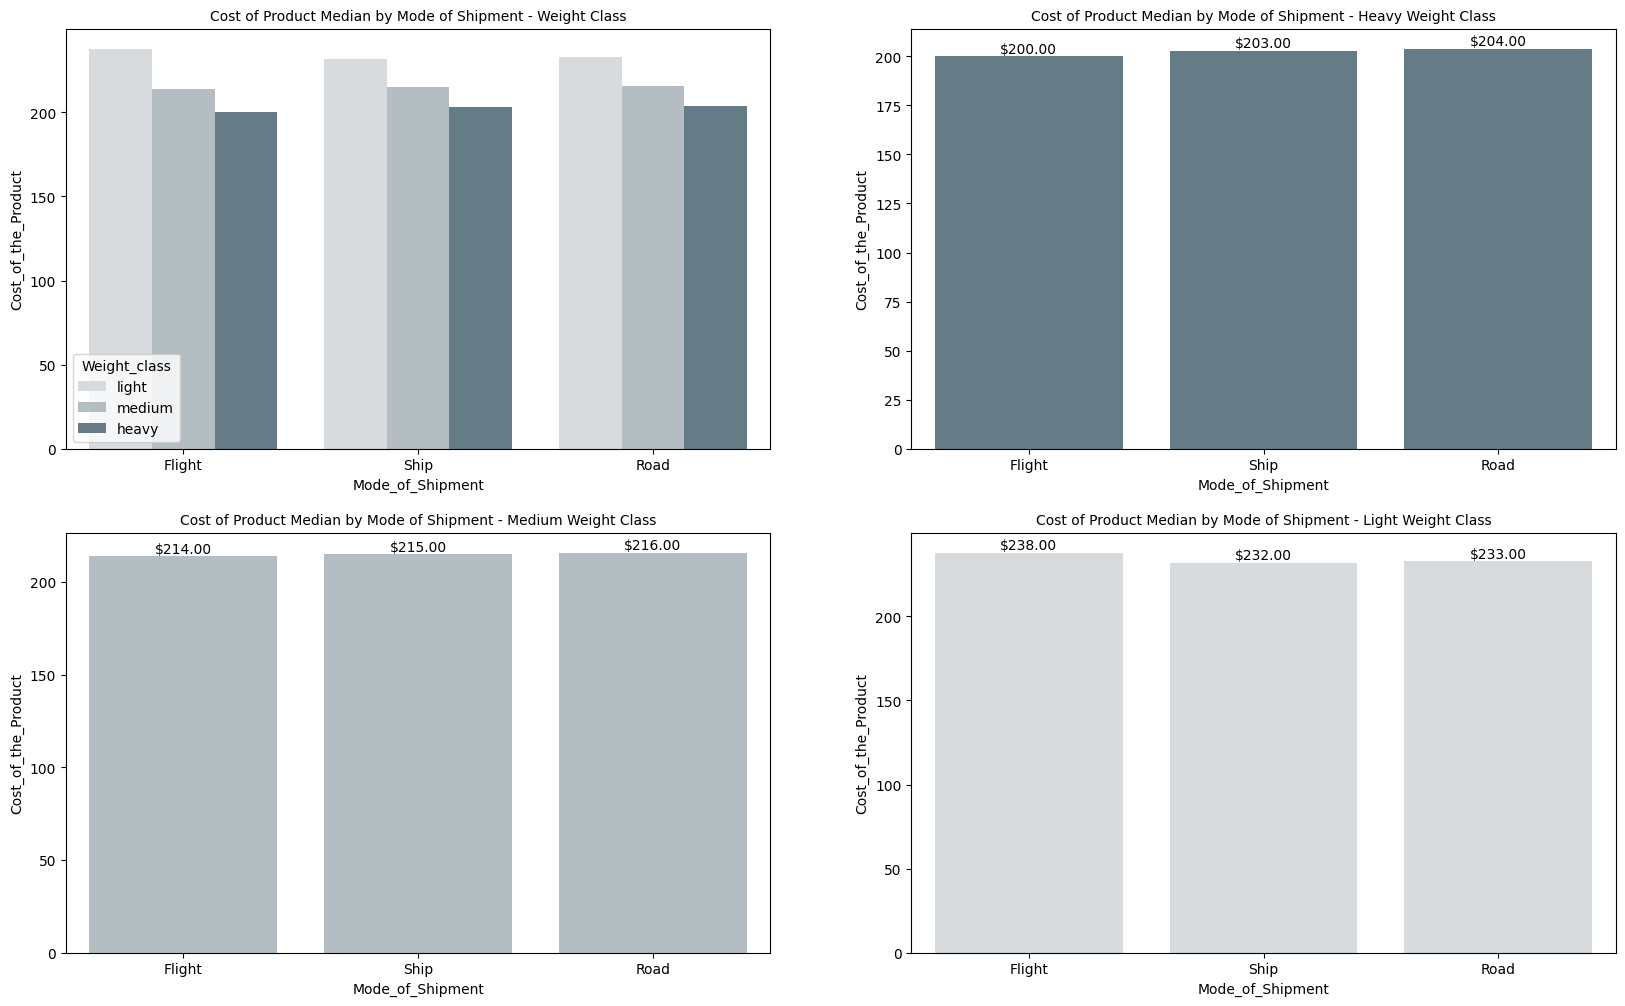

In [226]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))

sns.barplot(data=df, x='Mode_of_Shipment', y='Cost_of_the_Product', estimator=np.median, hue='Weight_class', errorbar=('ci', 0), palette=['#D6DBDF','#B0BEC5','#607D8B'], ax=ax1)
sns.barplot(data=df[df['Weight_class'] == 'heavy'], x='Mode_of_Shipment', y='Cost_of_the_Product', estimator=np.median, errorbar=('ci', 0), color='#607D8B', ax=ax2, order=['Flight','Ship','Road'])
sns.barplot(data=df[df['Weight_class'] == 'medium'], x='Mode_of_Shipment', y='Cost_of_the_Product', estimator=np.median, errorbar=('ci', 0), color='#B0BEC5', ax=ax3, order=['Flight','Ship','Road'])
sns.barplot(data=df[df['Weight_class'] == 'light'], x='Mode_of_Shipment', y='Cost_of_the_Product', estimator=np.median, errorbar=('ci', 0), color='#D6DBDF', ax=ax4, order=['Flight','Ship','Road'])

ax1.set_title('Cost of Product Median by Mode of Shipment - Weight Class', fontsize=10)
ax2.set_title('Cost of Product Median by Mode of Shipment - Heavy Weight Class', fontsize=10)
ax3.set_title('Cost of Product Median by Mode of Shipment - Medium Weight Class', fontsize=10)
ax4.set_title('Cost of Product Median by Mode of Shipment - Light Weight Class', fontsize=10)

ax2.bar_label(ax2.containers[0], label_type='edge', fmt=lambda x: f'${x:.2f}')
ax3.bar_label(ax3.containers[0], label_type='edge', fmt=lambda x: f'${x:.2f}')
ax4.bar_label(ax4.containers[0], label_type='edge', fmt=lambda x: f'${x:.2f}')

plt.show()

**Chi-Square Test**

Test independency between 2 categorical variable (Mode of Shipment & Cost Class).

Hypothesis:
- Ho: There is no dependency between Mode of Shipment and Cost Class (same proportion)
- Ha: Mode of Shipment and Cost Class are dependent (no significant difference)

In [227]:
df_c = pd.pivot_table(df, index=['Mode_of_Shipment'], columns=['Cost_class'], values=['Warehouse_block'], aggfunc='count')
df_c

Warehouse_block                 
Cost_class                 cheap expensive normal
Mode_of_Shipment                                 
Flight                       454       444    879
Road                         443       445    872
Ship                        1854      1889   3719

In [228]:
from scipy.stats import chi2_contingency

stat, pvalue, dof, expected = chi2_contingency(df_c)
pvalue

0.9806620885331447

In [229]:
if pvalue > 0.05:
    print(f'''pvalue = {pvalue:.5f}, pvalue >= 0.05, fail to reject Ho.
We DON'T HAVE ENOUGH EVIDENCE to conclude that there is a relationship / dependency between Mode of Shipment and Cost Class(Not Significantly Different Proportion).''')
else:
    print(f'''pvalue = {pvalue:.5f}, pvalue <= 0.05, reject Ho.
We HAVE ENOUGH EVIDENCE to conclude that there is a relationship / dependency between Mode of Shipment and Cost Class (Significantly Different Proportion).''')

pvalue = 0.98066, pvalue >= 0.05, fail to reject Ho.
We DON'T HAVE ENOUGH EVIDENCE to conclude that there is a relationship / dependency between Mode of Shipment and Cost Class(Not Significantly Different Proportion).


##### **INSIGHT 7**
****
**According to the analysis above we can conclude that:**
- Based on chi-squared test, we don't have enough evidence to conclude that there is a relationship / dependency between Mode of Shipment and Cost Class. (Not Significantly Different Proportion). As a result, the method of shipment has little to no impact on the cost of the product.
- However, if the customer cares about 1-5 dollar cost differences, flight mode shipment is preferred if the weight product is heavy or medium, and ship mode shipment is preferred if the weight product is light.

In [230]:
df.groupby('Warehouse_block')['Cost_of_the_Product'].median()

Warehouse_block
A    212.0
B    219.0
C    214.0
D    216.0
E    213.0
Name: Cost_of_the_Product, dtype: float64

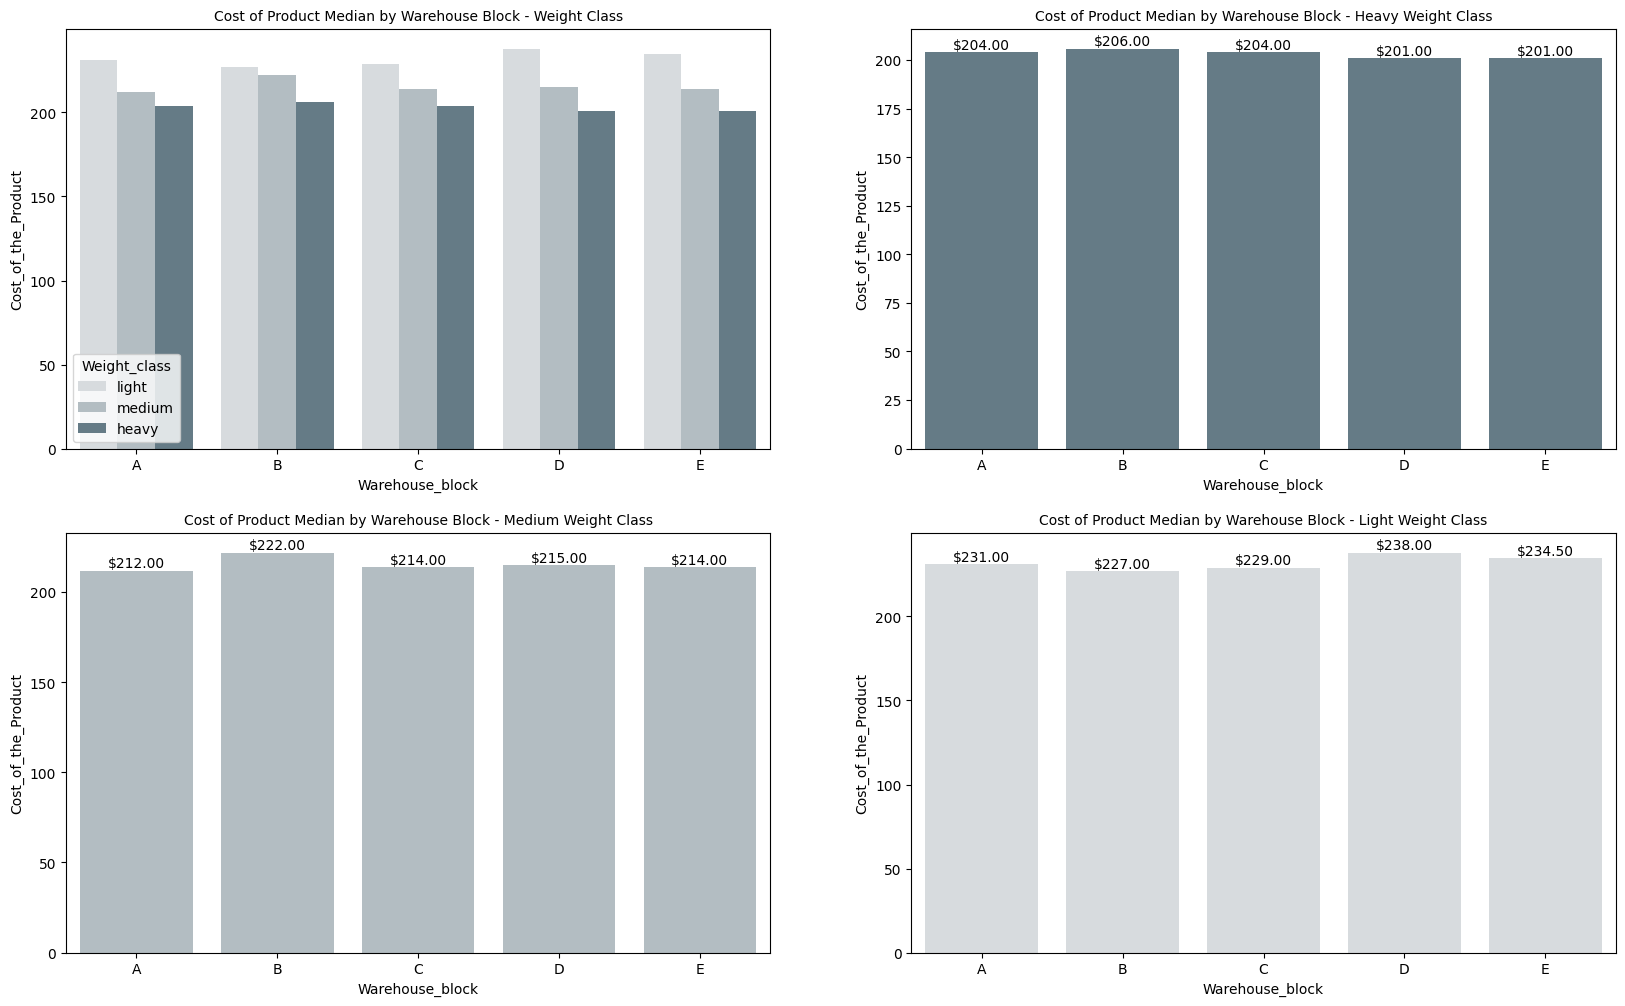

In [231]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))

sns.barplot(data=df, x='Warehouse_block', y='Cost_of_the_Product', estimator=np.median, hue='Weight_class', errorbar=('ci', 0), palette=['#D6DBDF','#B0BEC5','#607D8B'], ax=ax1, order=['A','B','C','D','E'])
sns.barplot(data=df[df['Weight_class'] == 'heavy'], x='Warehouse_block', y='Cost_of_the_Product', estimator=np.median, errorbar=('ci', 0), color='#607D8B', ax=ax2, order=['A','B','C','D','E'])
sns.barplot(data=df[df['Weight_class'] == 'medium'], x='Warehouse_block', y='Cost_of_the_Product', estimator=np.median, errorbar=('ci', 0), color='#B0BEC5', ax=ax3, order=['A','B','C','D','E'])
sns.barplot(data=df[df['Weight_class'] == 'light'], x='Warehouse_block', y='Cost_of_the_Product', estimator=np.median, errorbar=('ci', 0), color='#D6DBDF', ax=ax4, order=['A','B','C','D','E'])

ax1.set_title('Cost of Product Median by Warehouse Block - Weight Class', fontsize=10)
ax2.set_title('Cost of Product Median by Warehouse Block - Heavy Weight Class', fontsize=10)
ax3.set_title('Cost of Product Median by Warehouse Block - Medium Weight Class', fontsize=10)
ax4.set_title('Cost of Product Median by Warehouse Block - Light Weight Class', fontsize=10)

ax2.bar_label(ax2.containers[0], label_type='edge', fmt=lambda x: f'${x:.2f}')
ax3.bar_label(ax3.containers[0], label_type='edge', fmt=lambda x: f'${x:.2f}')
ax4.bar_label(ax4.containers[0], label_type='edge', fmt=lambda x: f'${x:.2f}')

plt.show()

**Chi-Square Test**

Test independency between 2 categorical variable (Warehouse Block & Cost Class).

Hypothesis:
- Ho: There is no dependency between Warehouse Block and Cost Class (same proportion)
- Ha: Warehouse Block and Cost Class are dependent (no significant difference)

In [232]:
df_w = pd.pivot_table(df, index=['Warehouse_block'], columns=['Cost_class'], values=['Mode_of_Shipment'], aggfunc='count')
df_w

Mode_of_Shipment                 
Cost_class                 cheap expensive normal
Warehouse_block                                  
A                            482       456    895
B                            416       460    957
C                            436       481    916
D                            450       476    908
E                            967       905   1794

In [233]:
stat, pvalue, dof, expected = chi2_contingency(df_w)
pvalue

0.08535403897882711

In [234]:
if pvalue > 0.05:
    print(f'''pvalue = {pvalue:.5f}, pvalue >= 0.05, fail to reject Ho.
We DON'T HAVE ENOUGH EVIDENCE to conclude that there is a relationship / dependency between Warehouse Block and Cost Class(Not Significantly Different Proportion).''')
else:
    print(f'''pvalue = {pvalue:.5f}, pvalue <= 0.05, reject Ho.
We HAVE ENOUGH EVIDENCE to conclude that there is a relationship / dependency between Warehouse Block and Cost Class (Significantly Different Proportion).''')

pvalue = 0.08535, pvalue >= 0.05, fail to reject Ho.
We DON'T HAVE ENOUGH EVIDENCE to conclude that there is a relationship / dependency between Warehouse Block and Cost Class(Not Significantly Different Proportion).


##### **INSIGHT 8**
****
**According to the analysis above we can conclude that:**
- Based on chi-squared test, we don't have enough evidence to conclude that there is a relationship / dependency between Warehouse Block and Cost Class. (Not Significantly Different Proportion). As a result, the method of shipment has little to no impact on the cost of the product.
- However, from the barchart, we can see that Warehouse D & E have the cheapest median of cost among the others for heavy weight products. Warehouse A have the cheapest median of cost among the others for medium weight products. Warehouse B have the cheapest median of cost among the others for light weight products.

### **Customer Rating Analysis**

In [235]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_class,Discount_class,Weight_class,rating_class,call_intensity
0,D,Flight,4,2,177,3,low,F,44,1233,1,normal,40-52(%),light,low rating,moderate
1,E,Flight,4,5,216,2,low,M,59,3088,1,normal,53-65(%),medium,high rating,moderate
2,A,Flight,2,2,183,4,low,M,48,3374,1,normal,40-52(%),medium,low rating,few
3,B,Flight,3,3,176,4,medium,M,10,1177,1,normal,1-13(%),light,low rating,few
4,C,Flight,2,2,184,3,medium,F,46,2484,1,normal,40-52(%),medium,low rating,few


**Relation with Numerical Columns**

In [236]:
df.corr(numeric_only=True, method='spearman')[['Customer_rating']]

,Customer_rating
Customer_care_calls,0.011862
Customer_rating,1.000000
Cost_of_the_Product,0.010242
Prior_purchases,0.010537
Discount_offered,-0.002299
Weight_in_gms,-0.004803
Reached.on.Time_Y.N,0.013108


**Relation with Categorical Columns**

In [237]:
df.describe(include=object)

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Cost_class,Discount_class,Weight_class,rating_class,call_intensity
count,10999,10999,10999,10999,10999,10999,10999,10999,10999
unique,5,3,3,2,3,5,3,2,3
top,E,Ship,low,F,normal,1-13(%),medium,low rating,moderate
freq,3666,7462,5297,5545,5470,8514,5498,6639,5885


In [238]:
# Warehouse Block
df_wb = pd.pivot_table(df, index=['Warehouse_block'], columns=['rating_class'], values=['Discount_class'], aggfunc='count')
df_wb

Discount_class           
rating_class       high rating low rating
Warehouse_block                          
A                          718       1115
B                          715       1118
C                          724       1109
D                          740       1094
E                         1463       2203

In [239]:
# Mode of Shipment
df_ms = pd.pivot_table(df, index=['Mode_of_Shipment'], columns=['rating_class'], values=['Discount_class'], aggfunc='count')
df_ms

Discount_class           
rating_class        high rating low rating
Mode_of_Shipment                          
Flight                      716       1061
Road                        709       1051
Ship                       2935       4527

In [240]:
# Product Importance
df_pi = pd.pivot_table(df, index=['Product_importance'], columns=['rating_class'], values=['Discount_class'], aggfunc='count')
df_pi

Discount_class           
rating_class          high rating low rating
Product_importance                          
high                          379        569
low                          2111       3186
medium                       1870       2884

In [241]:
# Gender
df_g = pd.pivot_table(df, index=['Gender'], columns=['rating_class'], values=['Discount_class'], aggfunc='count')
df_g

Discount_class           
rating_class    high rating low rating
Gender                                
F                      2191       3354
M                      2169       3285

In [242]:
def chi_test(data):
    stat, pvalue, dof, expected = chi2_contingency(data)
    pvalue

    if pvalue > 0.05:
        print(f'''pvalue = {pvalue:.5f}, pvalue >= 0.05, fail to reject Ho.
We DON'T HAVE ENOUGH EVIDENCE to conclude that there is a relationship / dependency between {data.index.name} and Rating Class (Not Significantly Different Proportion).''')
    else:
        print(f'''pvalue = {pvalue:.5f}, pvalue <= 0.05, reject Ho.
We HAVE ENOUGH EVIDENCE to conclude that there is a relationship / dependency between {data.index.name} and Rating Class (Significantly Different Proportion).''')

In [243]:
chi_test(df_wb)

pvalue = 0.91196, pvalue >= 0.05, fail to reject Ho.
We DON'T HAVE ENOUGH EVIDENCE to conclude that there is a relationship / dependency between Warehouse_block and Rating Class (Not Significantly Different Proportion).


In [244]:
chi_test(df_ms)

pvalue = 0.63250, pvalue >= 0.05, fail to reject Ho.
We DON'T HAVE ENOUGH EVIDENCE to conclude that there is a relationship / dependency between Mode_of_Shipment and Rating Class (Not Significantly Different Proportion).


In [245]:
chi_test(df_pi)

pvalue = 0.84782, pvalue >= 0.05, fail to reject Ho.
We DON'T HAVE ENOUGH EVIDENCE to conclude that there is a relationship / dependency between Product_importance and Rating Class (Not Significantly Different Proportion).


In [246]:
chi_test(df_g)

pvalue = 0.79885, pvalue >= 0.05, fail to reject Ho.
We DON'T HAVE ENOUGH EVIDENCE to conclude that there is a relationship / dependency between Gender and Rating Class (Not Significantly Different Proportion).


##### **INSIGHT 9**
****
**According to the analysis above we can conclude that:**
- Based on chi-squared test, we don't have enough evidence to conclude that there is a relationship / dependency between All Category Columns and Rating Class. (Not Significantly Different Proportion).
- Based on correlation, only weak correlation exists near 0. The strongest positive correlation is with Reached.on.Time_Y.N. The more products delivered late, the higher the customer's rating. This occurs because there is a positive correlation between rating and customer care calls; the more the company responds to customer calls, the higher the customer's rating.
- Returning to the first analysis, 60% of the data is late. This is why a high rating is based on how well the company responds to customer service calls even when the products arrive late.
- There are also slight positive correlation between customer rating and prior purchase and cost of products. The existing customer have higher chance to give high customer rating than newly customer. The higher cost of products, the higher the customer's rating.

### **Discount Offered Analysis**

In [247]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_class,Discount_class,Weight_class,rating_class,call_intensity
0,D,Flight,4,2,177,3,low,F,44,1233,1,normal,40-52(%),light,low rating,moderate
1,E,Flight,4,5,216,2,low,M,59,3088,1,normal,53-65(%),medium,high rating,moderate
2,A,Flight,2,2,183,4,low,M,48,3374,1,normal,40-52(%),medium,low rating,few
3,B,Flight,3,3,176,4,medium,M,10,1177,1,normal,1-13(%),light,low rating,few
4,C,Flight,2,2,184,3,medium,F,46,2484,1,normal,40-52(%),medium,low rating,few


<Axes: xlabel='Product_importance', ylabel='Discount_offered'>

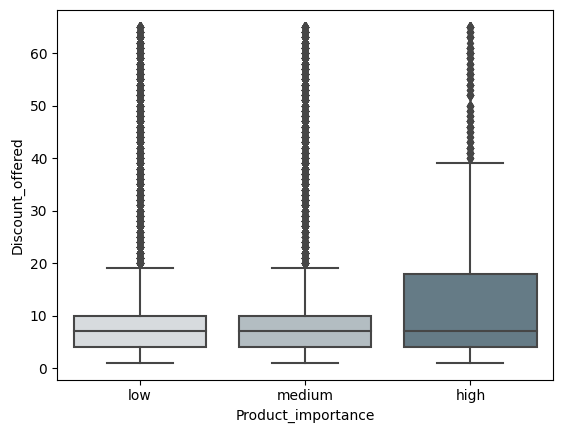

In [254]:
sns.boxplot(data=df, x='Product_importance', y='Discount_offered', palette=['#D6DBDF','#B0BEC5','#607D8B'])

In [259]:
df['customer_segment'] = ['Premium' if (x<=3) else 'Platinum' if (x>=7) else 'Golden' for x in df['Prior_purchases'].values]

<Axes: xlabel='Prior_purchases', ylabel='Discount_offered'>

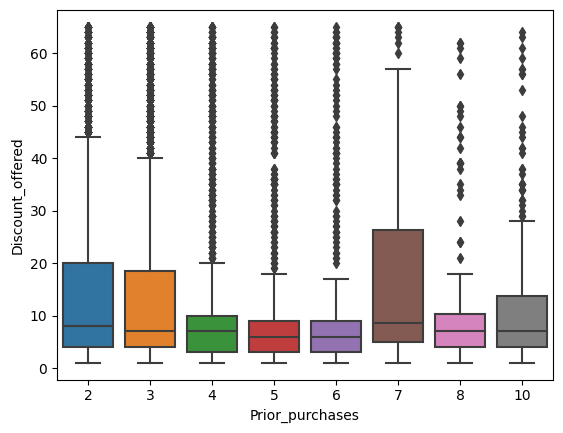

In [260]:
sns.boxplot(data=df, x='Prior_purchases', y='Discount_offered')

<Axes: xlabel='customer_segment', ylabel='Discount_offered'>

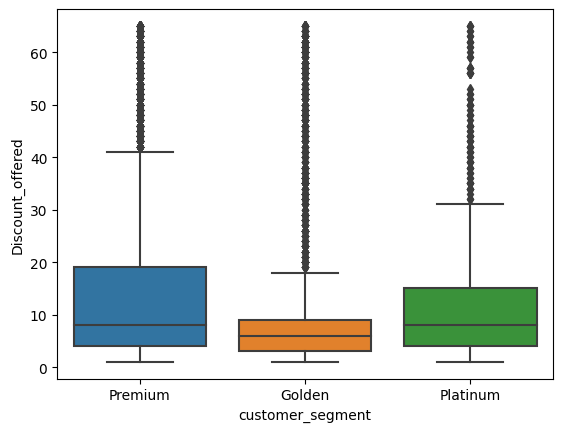

In [261]:
sns.boxplot(data=df, x='customer_segment', y='Discount_offered')

##### **INSIGHT 10**
****
**According to the analysis above we can conclude that:**
- Products of high importance were offered higher discounts.
- Premium and platinum customers were offered higher discounts.

****
# **Conclusions**
****
1. There is a double amount (2x) of products in Warehouse E compared to Warehouses A, B, C, and D. Warehouses A, B, C, and D have approx. the same amount. We can't compare Warehouse E with the others.
2. 60% products are delivered late, 40% products are delivered on time.
3. Heavy weight products and low discount products below 13% have more products that delivered on time (0) than late (1).
4. Ship shipping is preferred by the company over flight or road shipping. Despite the fact that ship deliveries are frequently delayed.
5. The company did not handled high important products well. The number of high important products delivered late is 1.9 times the number of products delivered on time. This is much worse than low or medium important products.
6. High rating is based on how well the company responds to customer service calls even when the products arrive late.
7. The higher the product cost, the more calls received to inquire about shipment.
8. The lighter the weight of the products, the more calls received to inquire about shipment.
9. The golden and platinum customer have higher chance to give high rating than premium customer.
10. Products of high importance also Premium and platinum customers were offered higher discounts.

****
# **Recommendations**
****
1. Companies should not offer large discounts above 13% to the premium or new customer if they cannot guarantee timely delivery.
2. Divide products into multiple warehouse, do not just pile up in one warehouse.
3. Company prefer shipping by ship because they believe the price is more affordable. In fact, for heavy and medium loads, flight mode is preferable because it is less expensive and arrives faster. In addition, the company may consider using road shipment instead of ship for light weight items.
4. A higher priority should be placed on shipping high important products because the ratio of delays is nearly two times than on-time deliveries. In fact, the higher the importance, the more expensive, and customers who buy expensive products will likely be more loyal if the products arrive on time.
5. The important thing is to respond to customer service calls frequently; this increases the likelihood of a high rating, even if the item arrives late.
6. Maintain the timeliness of delivery to existing customers (golden and platinum customer), as they have a great opportunity to provide higher ratings.

